# Klassifikation mit einem Neuronalen Netz

## Trainingsdaten

In [7]:
%pip install torch
%pip install torchvision
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

def load(data):
    return np.load(data)['arr_0']
# load dataset
train_data = load('Data\K49-data\k49-train-imgs.npz')
test_data = load('Data\K49-data\k49-test-imgs.npz')


In [9]:
train_data.data.shape, test_data.data.shape

((232365, 28, 28), (38547, 28, 28))

Wir haben 60.000 Trainingsbilder (jeweils 28x28 Pixel) und 10.000 Testbilder im Datenset MNIST

In [10]:
# print(train_data.data[17].shape)
# print(train_data.targets[17])
# print(train_data.data[17][5:10][:])



NotImplementedError: multi-dimensional sub-views are not implemented

In [11]:
# visualize the 17th image
plt.imshow(train_data.data[17], cmap='gray')

NotImplementedError: multi-dimensional sub-views are not implemented

## Definition des Neuronalen Netzes

In [12]:
# set parameters for feed forward neural network
input_size = 28*28 #=784
hidden_size = 400
num_classes = 49
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# create dataloader
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

# create neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) # Hidden layer
        self.relu = nn.ReLU() # Activation function
        self.l2 = nn.Linear(hidden_size, num_classes) # Output layer

    def forward(self, x):  # Forward pass
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)


In [13]:
# test the model before training on images 17:20 from test data
# print predictions and images

for i in range(17, 21):
    img = test_data.data[i]
    plt.imshow(img, cmap='gray')
    plt.show()
    img = img.reshape(-1, 28*28)
    img = img.type(torch.FloatTensor)
    output = model(img)
    _, predicted = torch.max(output.data, 1)
    print('Predicted: ', predicted.item())


NotImplementedError: multi-dimensional sub-views are not implemented

Wie erwartet sind die Gewichte des Neuronalen Netzes vor dem Training zufällig gewählt, so dass die Klassifikation misslingt.

## Training des Neuronalen Netz

In [ ]:

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward and optimize
        optimizer.zero_grad() # clear gradients
        loss.backward() # backpropagation
        optimizer.step() # update weights

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))



Epoch [1/2], Step [100/600], Loss: 0.4144
Epoch [1/2], Step [200/600], Loss: 0.2287
Epoch [1/2], Step [300/600], Loss: 0.2167
Epoch [1/2], Step [400/600], Loss: 0.1839
Epoch [1/2], Step [500/600], Loss: 0.1459
Epoch [1/2], Step [600/600], Loss: 0.0778
Epoch [2/2], Step [100/600], Loss: 0.1053
Epoch [2/2], Step [200/600], Loss: 0.1232
Epoch [2/2], Step [300/600], Loss: 0.1574
Epoch [2/2], Step [400/600], Loss: 0.0905
Epoch [2/2], Step [500/600], Loss: 0.1073
Epoch [2/2], Step [600/600], Loss: 0.0837


## Test des Neuronalen Netzes

In [ ]:
# test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Test Accuracy of the model on the 10000 test images: 96.85 %


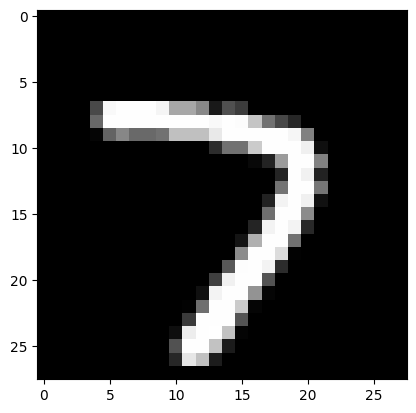

Predicted:  7


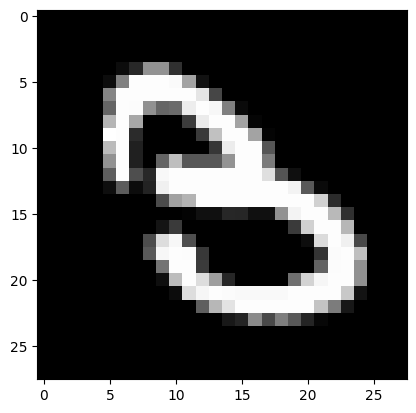

Predicted:  3


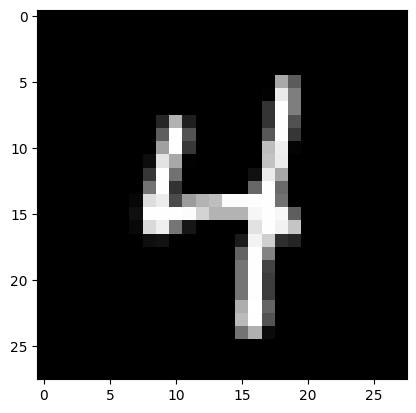

Predicted:  4


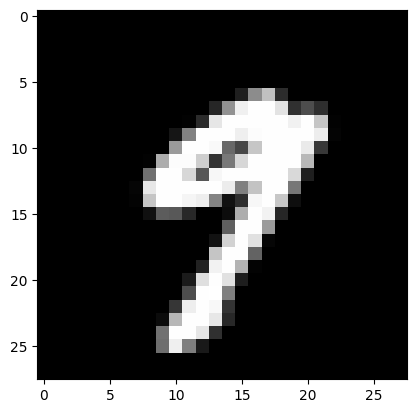

Predicted:  9


In [ ]:
# test the model after training on images 17:20 from test data
# print predictions and images

for i in range(17, 21):
    img = test_data.data[i]
    plt.imshow(img, cmap='gray')
    plt.show()
    img = img.reshape(-1, 28*28)
    img = img.type(torch.FloatTensor)
    output = model(img)
    _, predicted = torch.max(output.data, 1)
    print('Predicted: ', predicted.item())

## Test mit kleinerem Trainingsdatensatz

In [ ]:
# choose a small traings set randomly
total_images = len(datasets.MNIST(root='data', train=True, download=True))  # Gesamtanzahl der Trainingsbilder
train_size = 700 #int(0.7 * total_images)  # 70% der Bilder für das Training

train_data_small = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
train_data_small.data = train_data.data[:train_size]
train_data_small.targets = train_data.targets[:train_size]

test_data_small = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
test_data_small.data = test_data.data[train_size:]
test_data_small.targets = test_data.targets[train_size:]

In [ ]:
train_data, train_data_small

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 42000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor())

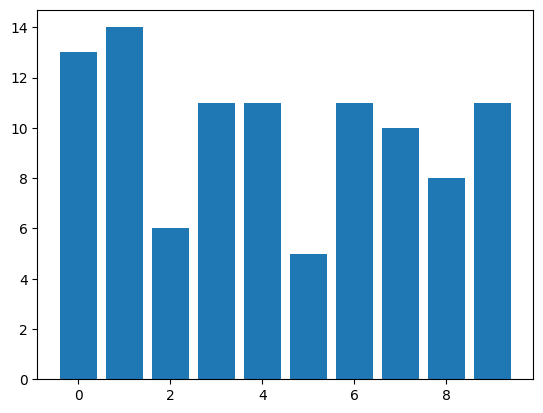

In [ ]:
import matplotlib.pyplot as plt

tr = train_data_small.targets.numpy()

if len(tr) == 0:
    print("Error: The train_data_small.targets array is empty.")
else:
    # plot bar chart of the number of images in each class
    plt.bar(np.arange(10), np.bincount(tr))
    plt.show()


In [ ]:
# train model_small on train_data_small
# print loss and accuracy on train_data_small and test_data_small

batch_size = 10
num_epochs = 10
learning_rate = 0.001
report = 5

model_small = NeuralNet(input_size, hidden_size, num_classes)



# create dataloader
train_loader_small = DataLoader(dataset=train_data_small, batch_size=batch_size, shuffle=True)
test_loader_small = DataLoader(dataset=test_data_small, batch_size=batch_size, shuffle=False)


# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_small.parameters(), lr=learning_rate)

# train the model
total_step = len(train_loader_small)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader_small):
        # reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)

        # forward pass
        outputs = model_small(images)
        loss = criterion(outputs, labels)

        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print loss on train_data_small and test_data_small
        if (i+1) % report == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        # print accuracy on train_data_small and test_data_small
        if (i+1) % report == 0:
            # In test phase, we don't need to compute gradients (for memory efficiency)
            with torch.no_grad():
                correct = 0
                total = 0
                for images, labels in train_loader_small:
                    images = images.reshape(-1, 28*28)
                    outputs = model_small(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                print('Train Accuracy of the model on the train images: {} %'.format(100 * correct / total))

            # In test phase, we don't need to compute gradients (for memory efficiency)
            with torch.no_grad():
                correct = 0
                total = 0
                for images, labels in test_loader_small:
                    images = images.reshape(-1, 28*28)
                    outputs = model_small(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                print('Test Accuracy of the model on the test images: {} %'.format(100 * correct / total))

# test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader_small:
        images = images.reshape(-1, 28*28)
        outputs = model_small(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the test images: {} %'.format(100 * correct / total))



Epoch [1/10], Step [5/100], Loss: 2.1572
Train Accuracy of the model on the train images: 21.4 %
Test Accuracy of the model on the test images: 23.244444444444444 %
Epoch [1/10], Step [10/100], Loss: 2.0135
Train Accuracy of the model on the train images: 35.4 %
Test Accuracy of the model on the test images: 34.65555555555556 %
Epoch [1/10], Step [15/100], Loss: 1.8571
Train Accuracy of the model on the train images: 63.5 %
Test Accuracy of the model on the test images: 60.94444444444444 %
Epoch [1/10], Step [20/100], Loss: 1.7955
Train Accuracy of the model on the train images: 70.7 %
Test Accuracy of the model on the test images: 67.18888888888888 %
Epoch [1/10], Step [25/100], Loss: 1.1323
Train Accuracy of the model on the train images: 72.6 %
Test Accuracy of the model on the test images: 68.07777777777778 %
Epoch [1/10], Step [30/100], Loss: 0.8220
Train Accuracy of the model on the train images: 73.7 %
Test Accuracy of the model on the test images: 68.26666666666667 %
Epoch [1/1

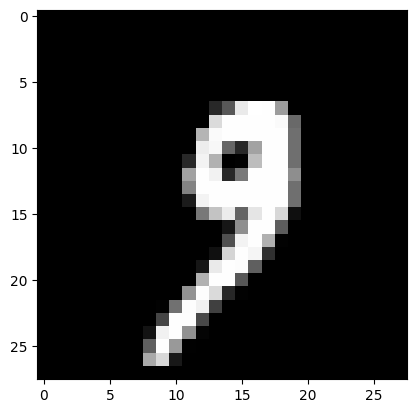

Predicted:  9


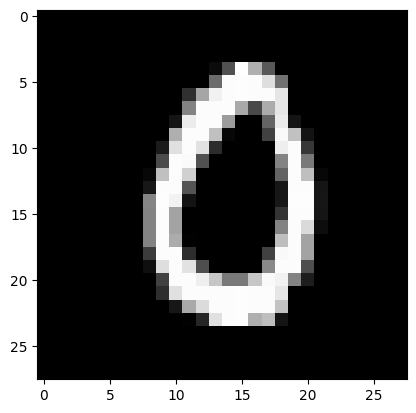

Predicted:  0


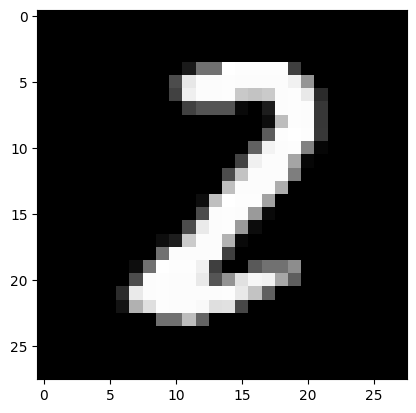

Predicted:  2


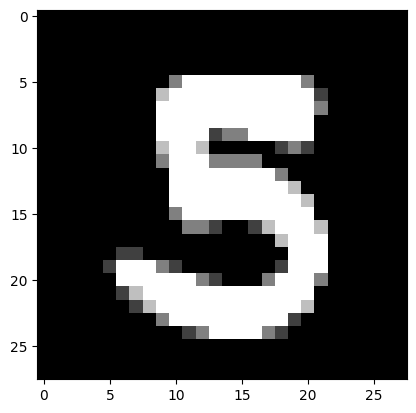

Predicted:  5


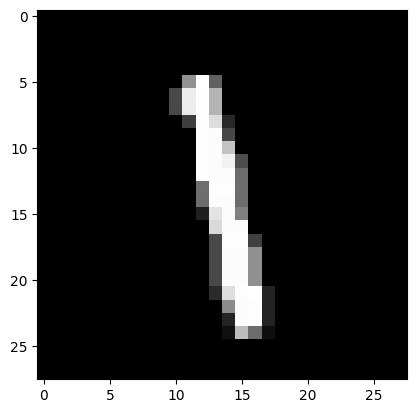

Predicted:  1


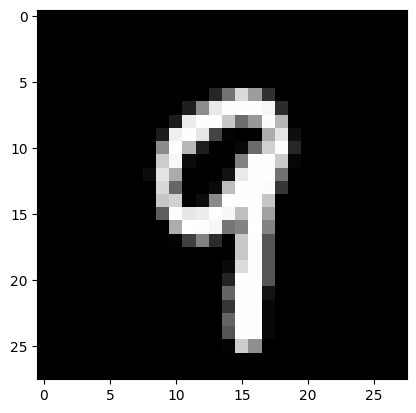

Predicted:  9


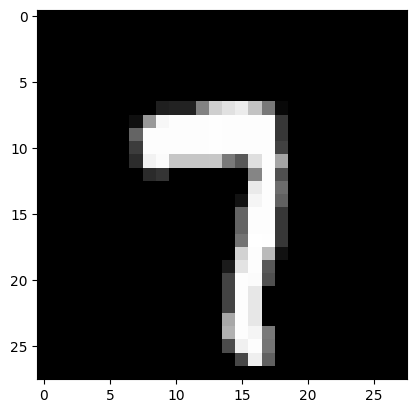

Predicted:  7


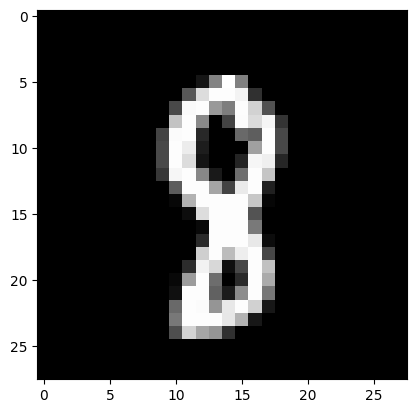

Predicted:  8


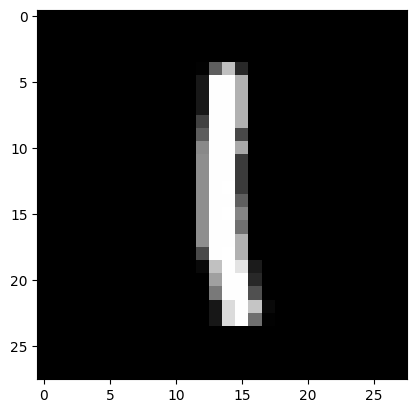

Predicted:  1


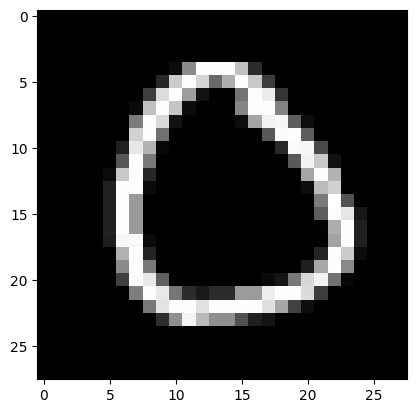

Predicted:  0


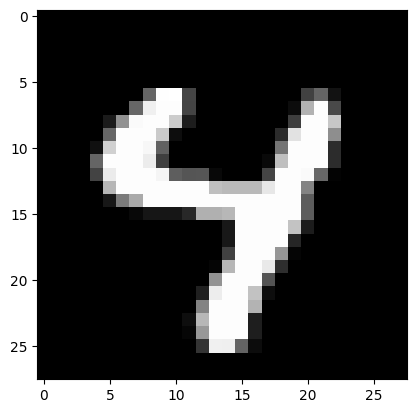

Predicted:  4


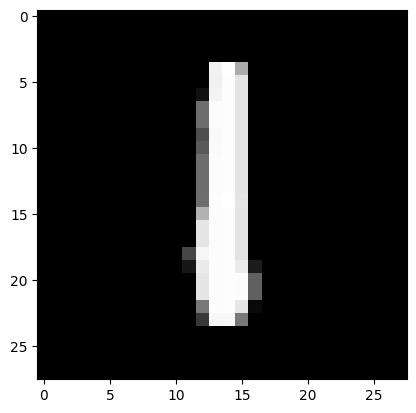

Predicted:  1


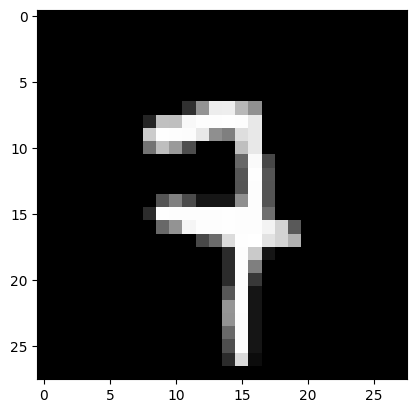

Predicted:  9


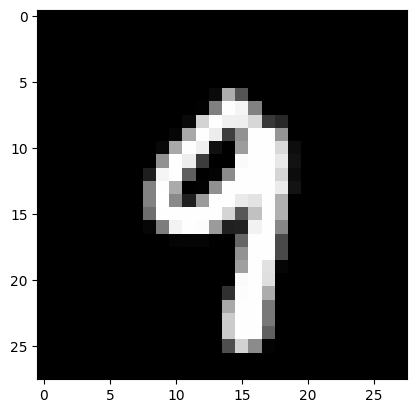

Predicted:  9


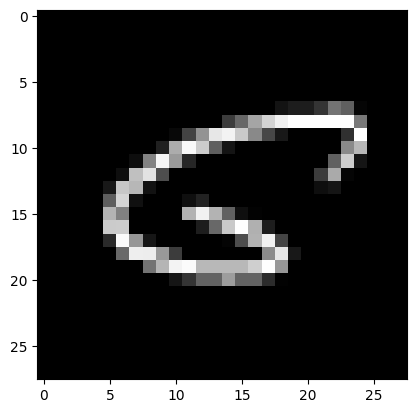

Predicted:  5


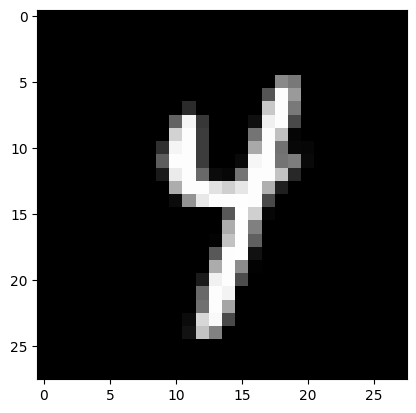

Predicted:  4


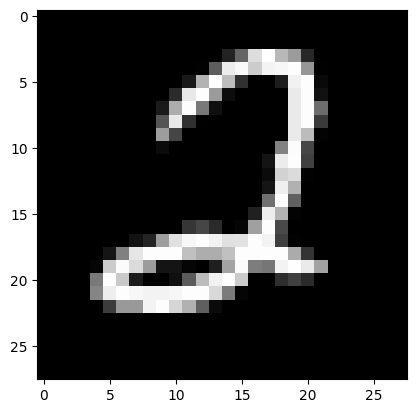

Predicted:  2


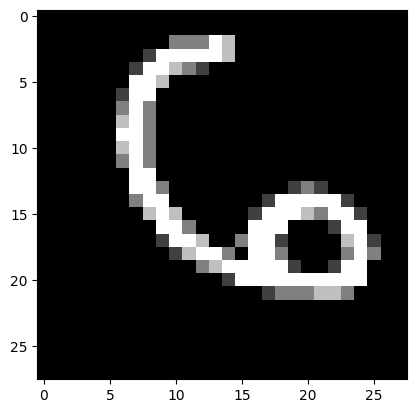

Predicted:  2


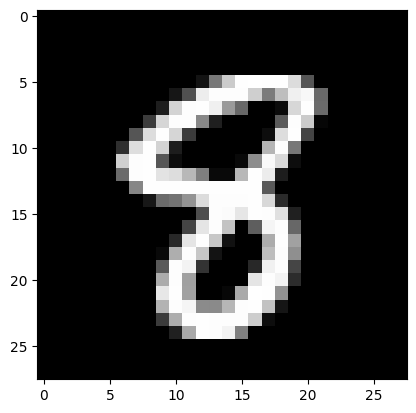

Predicted:  8


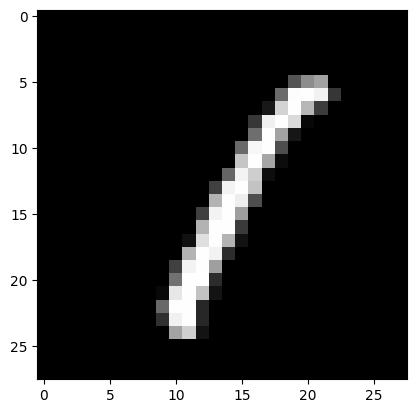

Predicted:  1


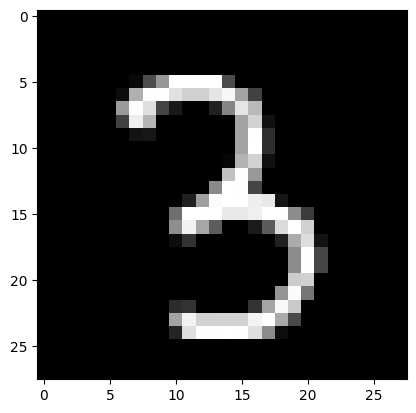

Predicted:  3


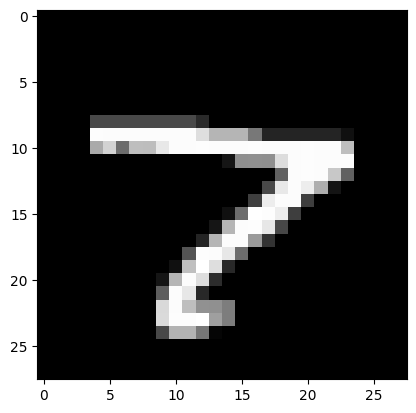

Predicted:  7


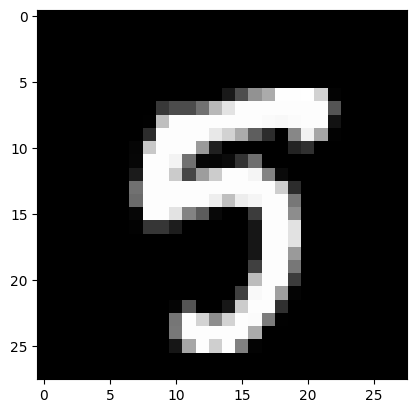

Predicted:  9


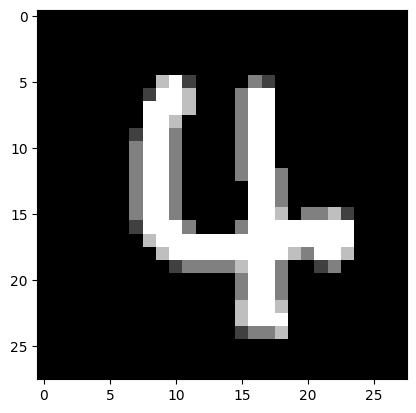

Predicted:  4


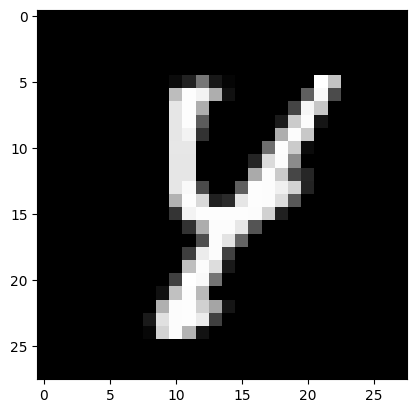

Predicted:  4


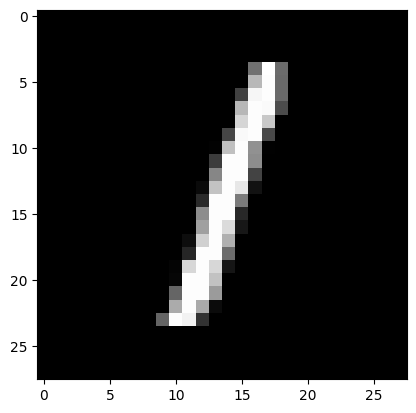

Predicted:  1


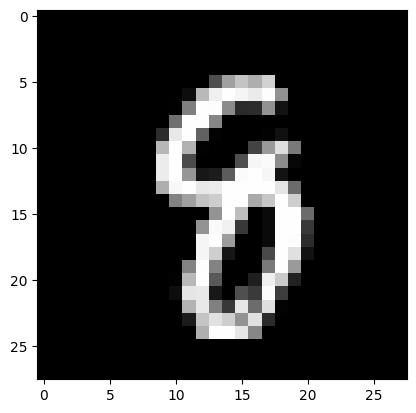

Predicted:  8


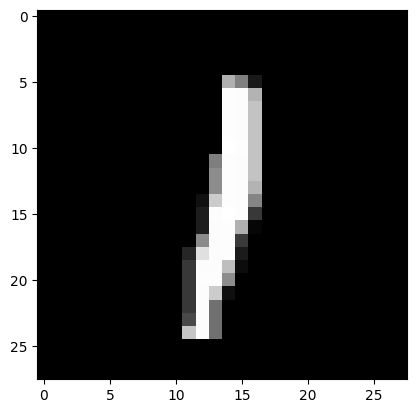

Predicted:  1


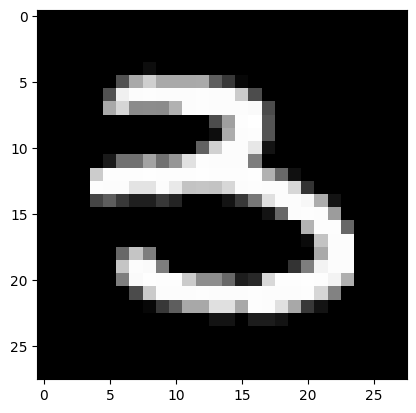

Predicted:  3


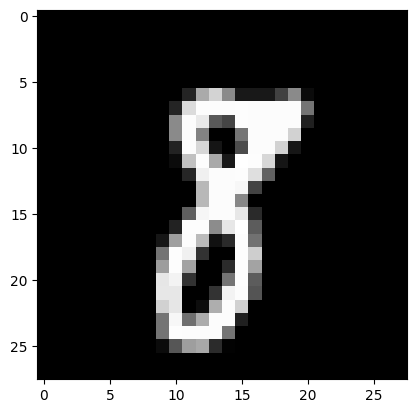

Predicted:  8


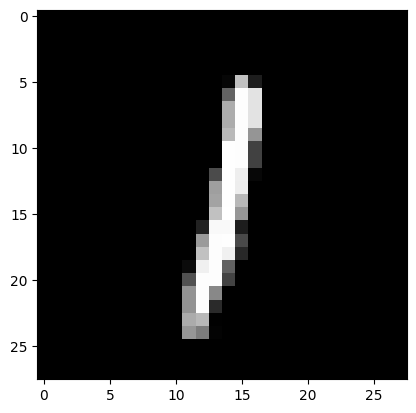

Predicted:  1


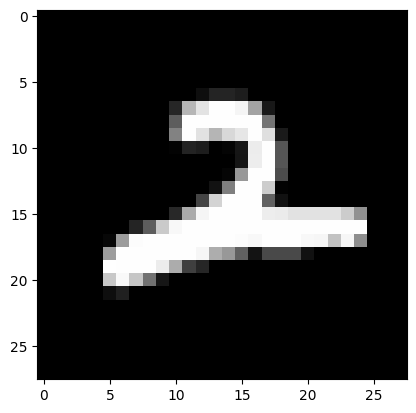

Predicted:  2


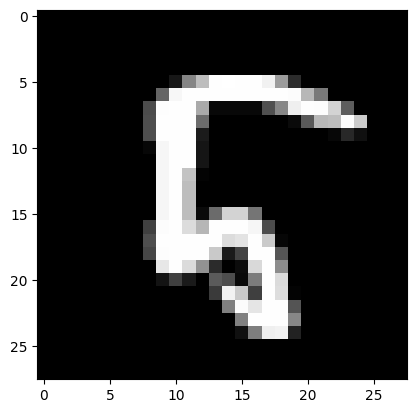

Predicted:  6


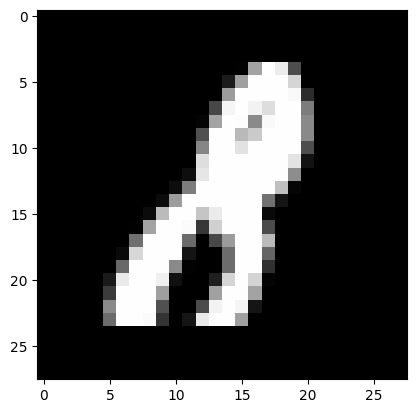

Predicted:  8


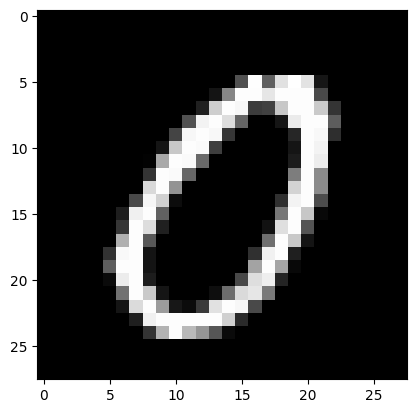

Predicted:  0


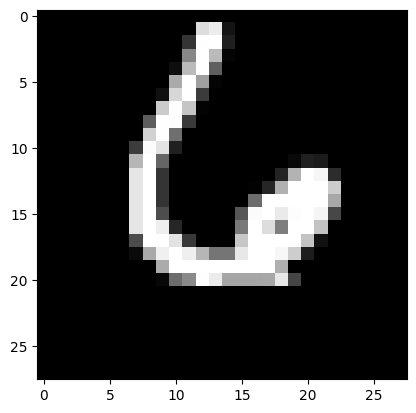

Predicted:  6


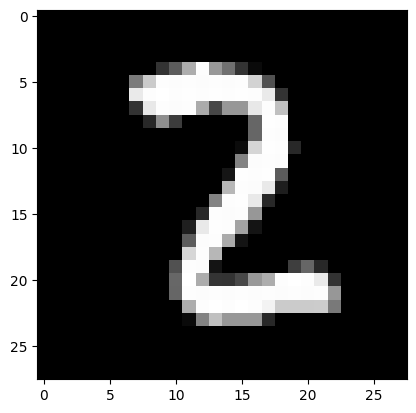

Predicted:  2


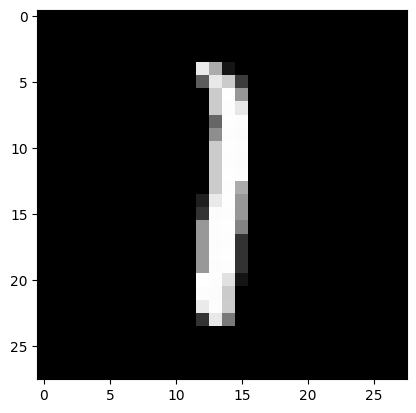

Predicted:  1


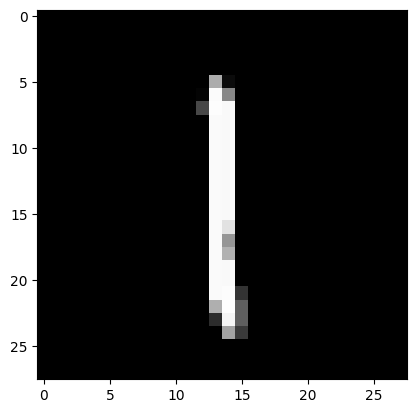

Predicted:  1


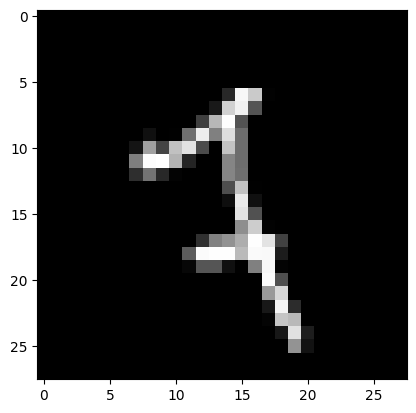

Predicted:  1


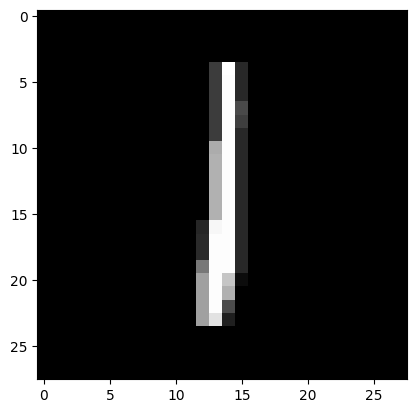

Predicted:  1


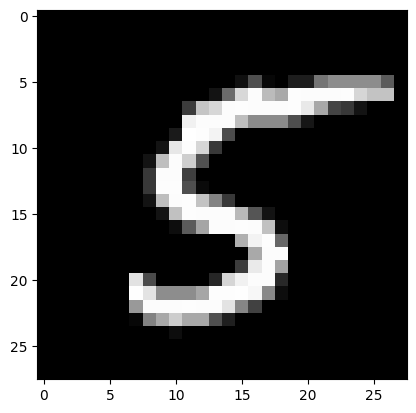

Predicted:  5


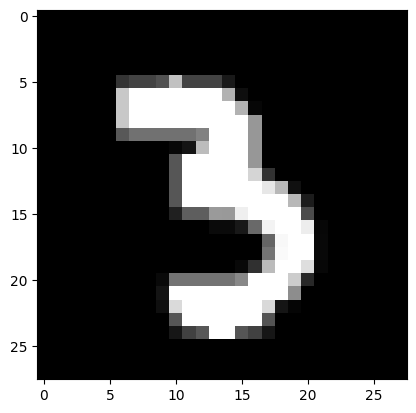

Predicted:  3


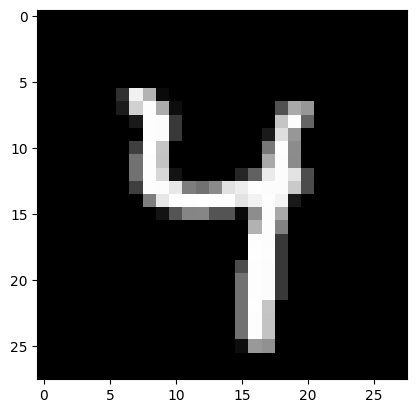

Predicted:  4


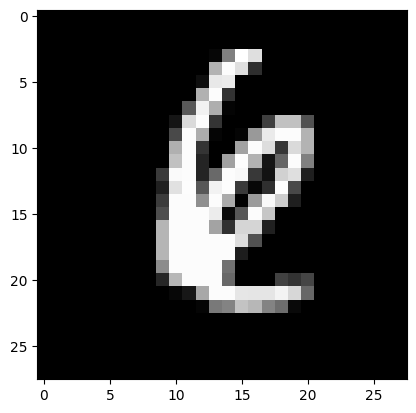

Predicted:  6


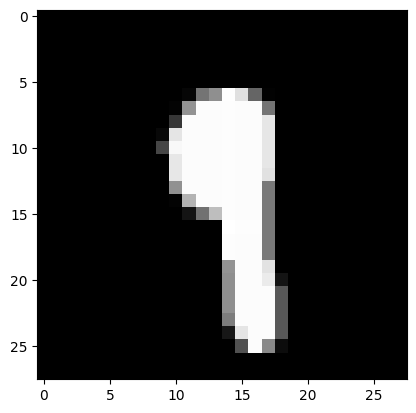

Predicted:  9


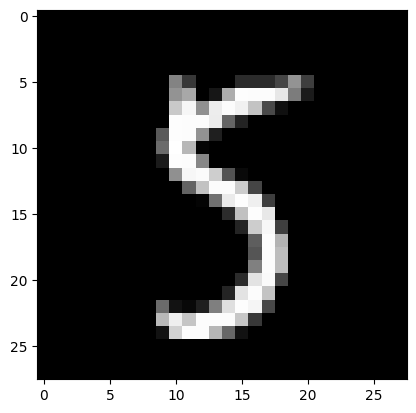

Predicted:  5


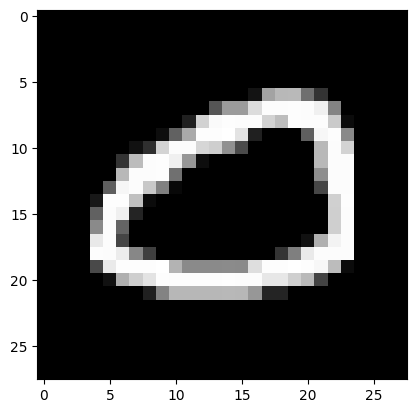

Predicted:  0


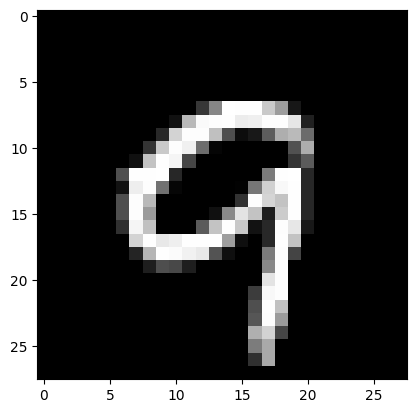

Predicted:  9


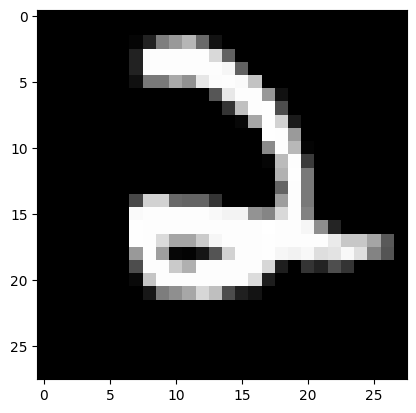

Predicted:  2


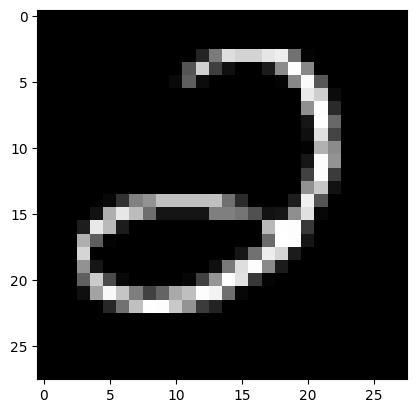

Predicted:  2


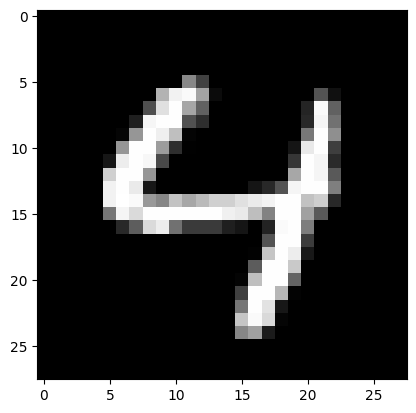

Predicted:  4


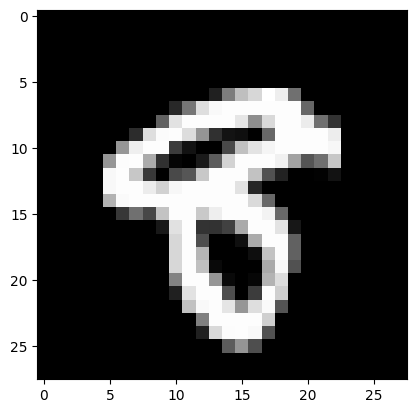

Predicted:  9


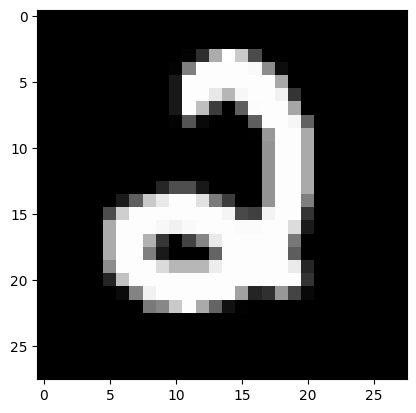

Predicted:  2


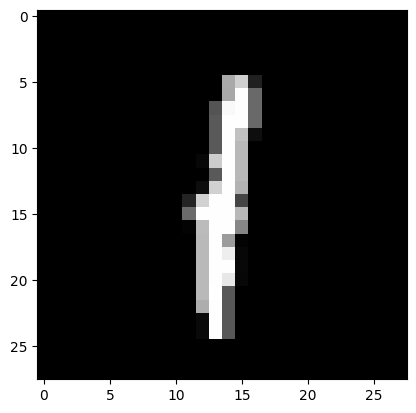

Predicted:  1


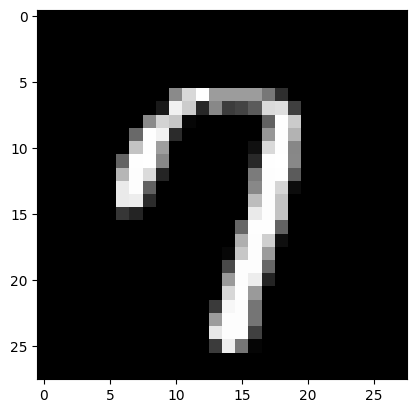

Predicted:  7


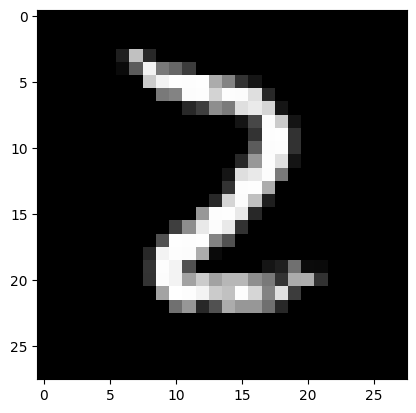

Predicted:  2


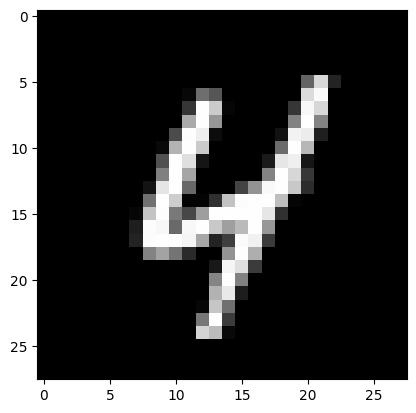

Predicted:  4


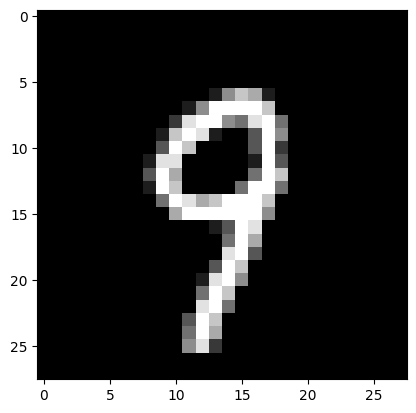

Predicted:  9


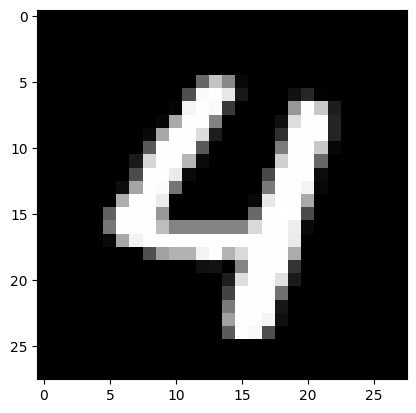

Predicted:  4


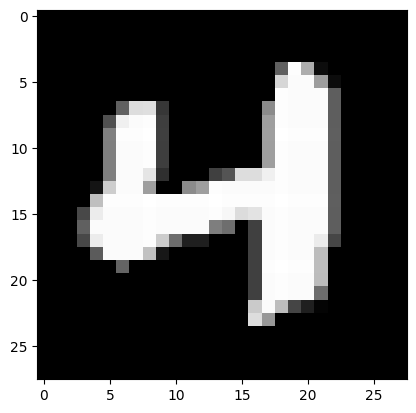

Predicted:  4


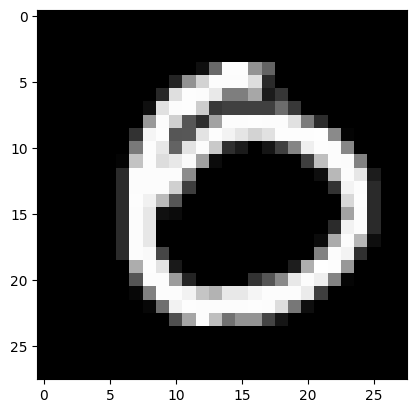

Predicted:  0


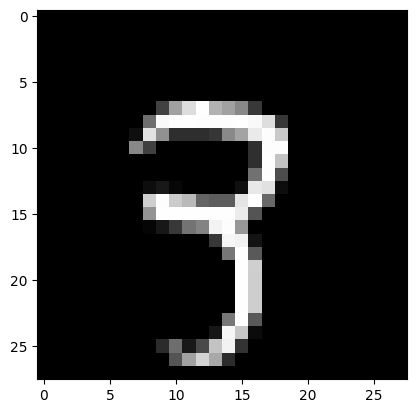

Predicted:  7


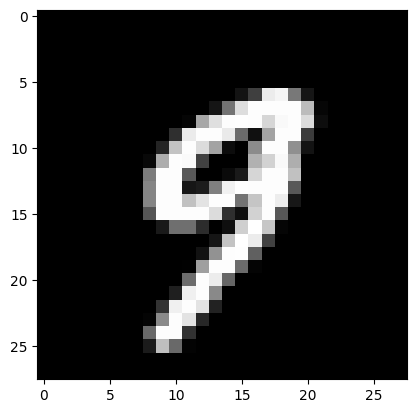

Predicted:  9


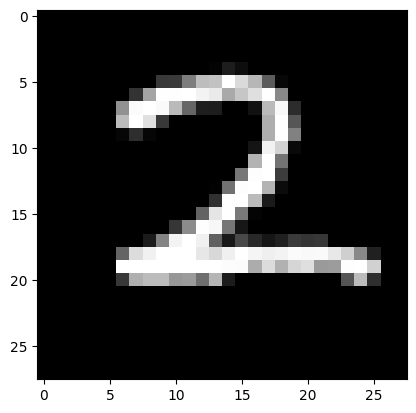

Predicted:  2


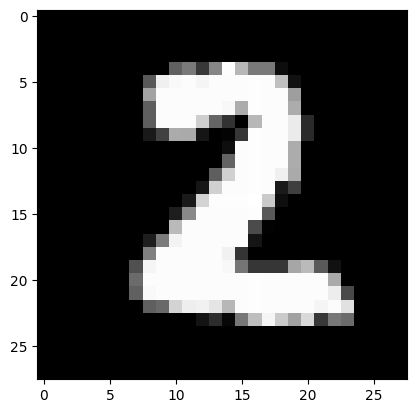

Predicted:  2


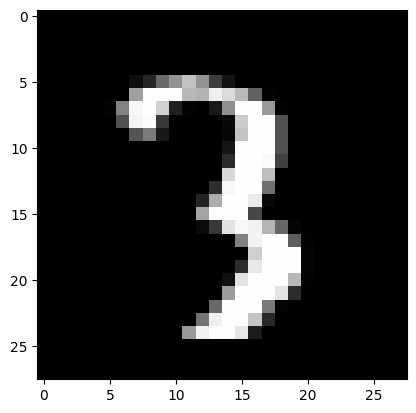

Predicted:  3


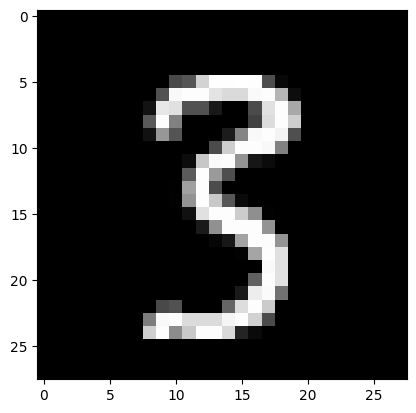

Predicted:  3


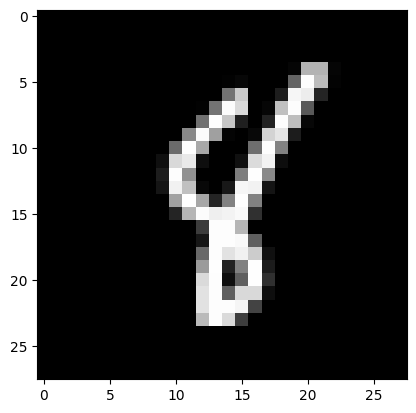

Predicted:  8


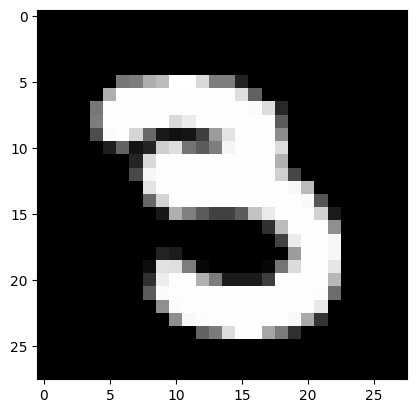

Predicted:  3


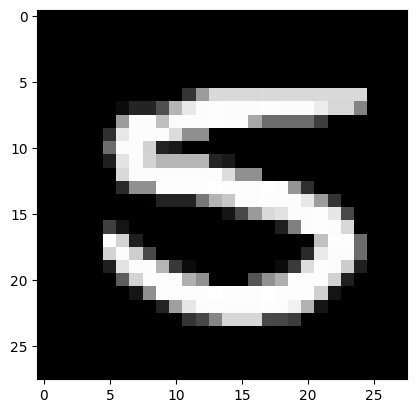

Predicted:  5


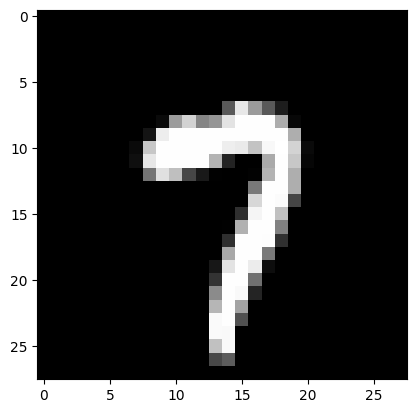

Predicted:  7


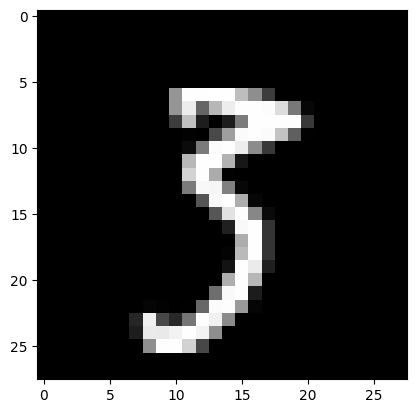

Predicted:  3


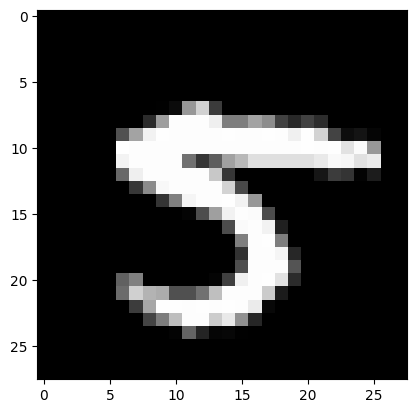

Predicted:  8


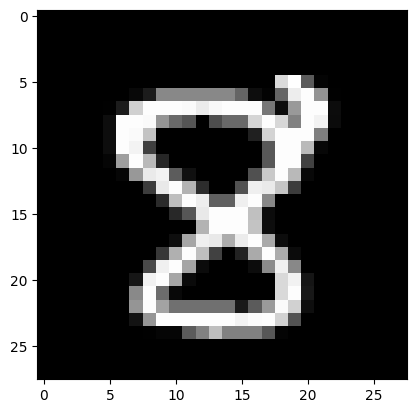

Predicted:  8


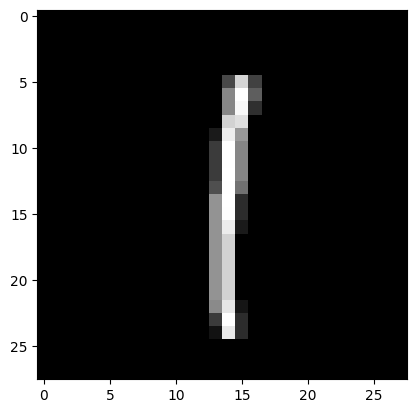

Predicted:  1


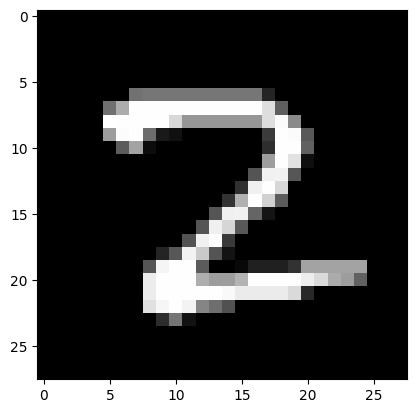

Predicted:  2


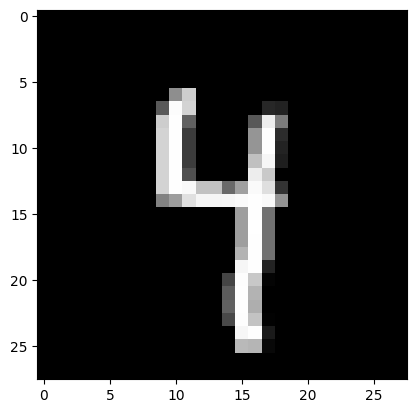

Predicted:  4


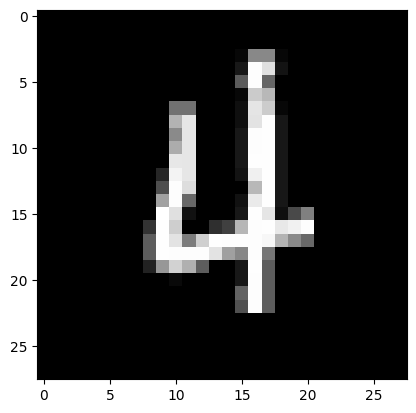

Predicted:  4


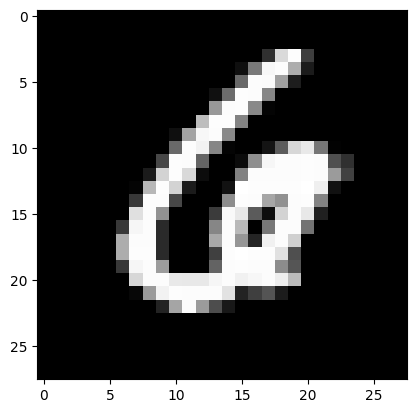

Predicted:  6


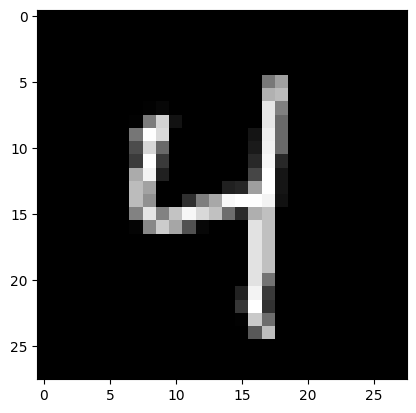

Predicted:  4


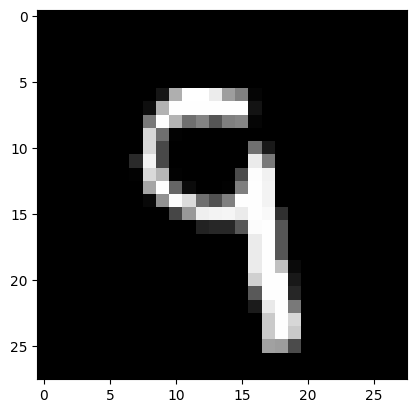

Predicted:  9


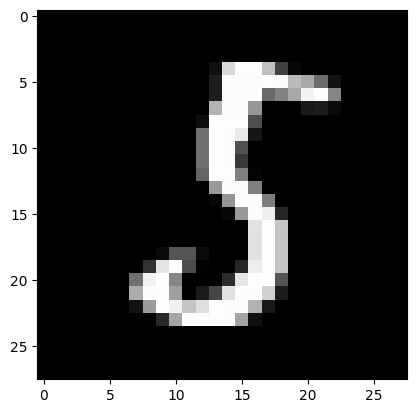

Predicted:  8


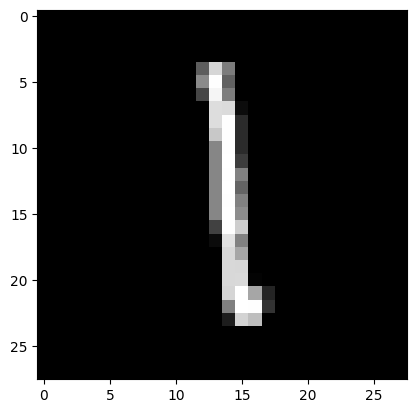

Predicted:  1


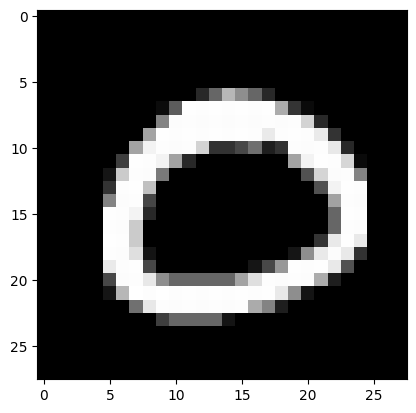

Predicted:  0


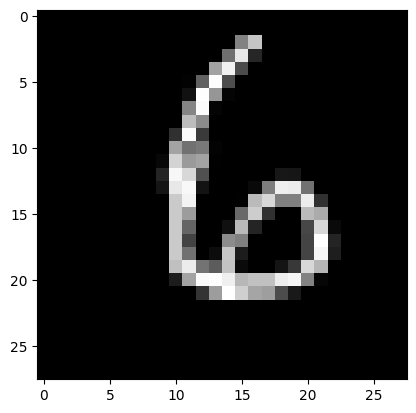

Predicted:  6


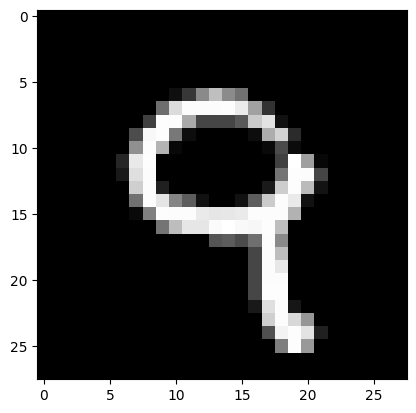

Predicted:  9


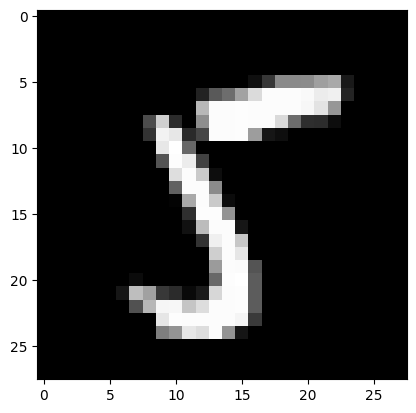

Predicted:  5


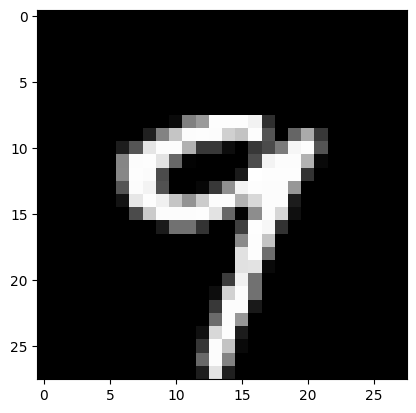

Predicted:  9


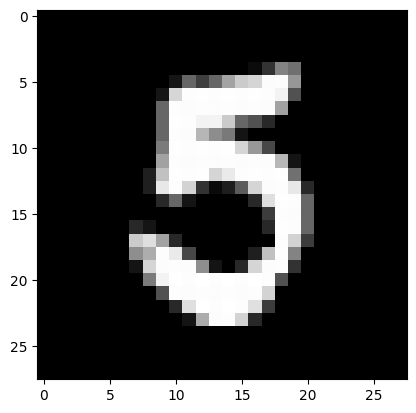

Predicted:  5


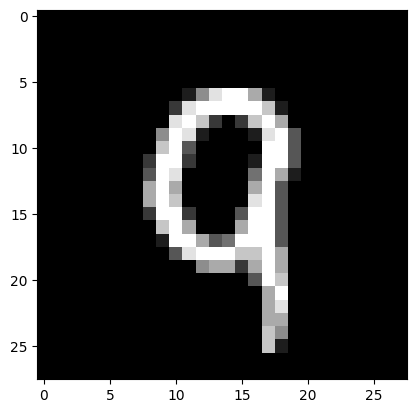

Predicted:  9


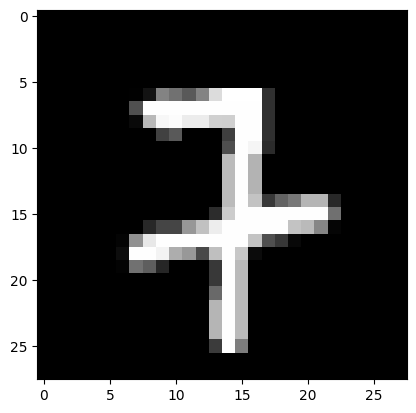

Predicted:  7


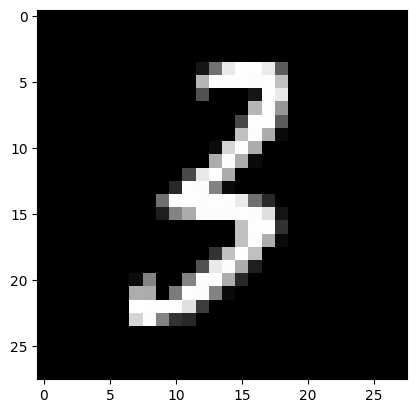

Predicted:  3


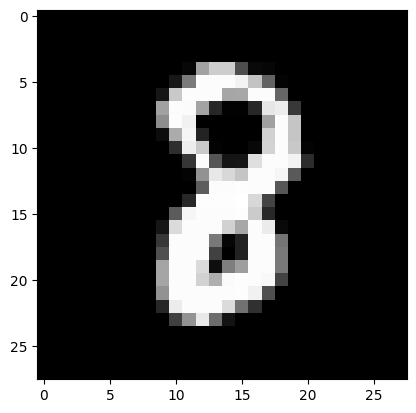

Predicted:  8


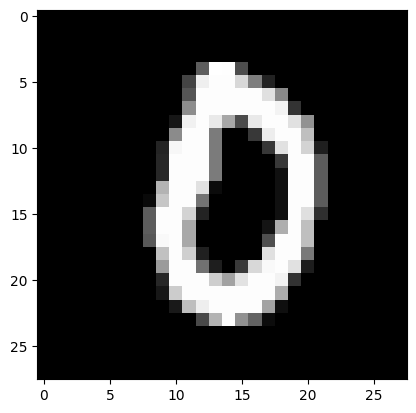

Predicted:  0


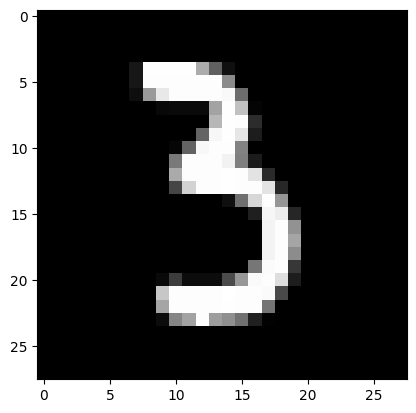

Predicted:  5


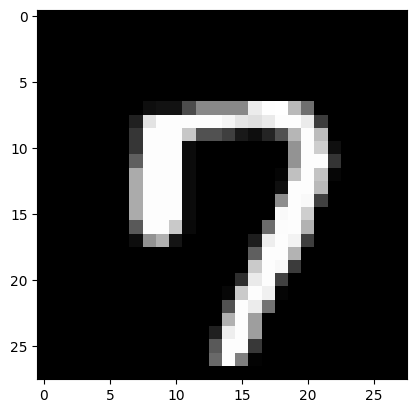

Predicted:  7


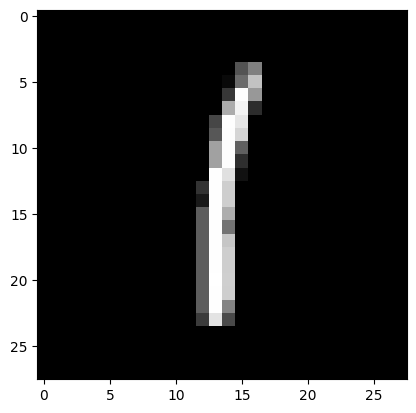

Predicted:  1


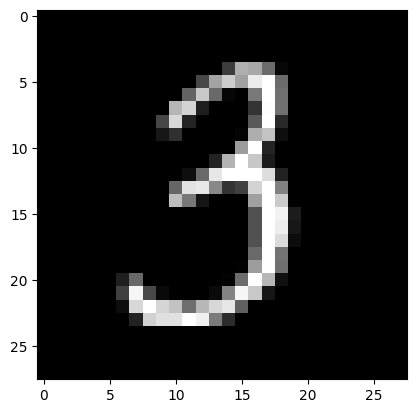

Predicted:  3


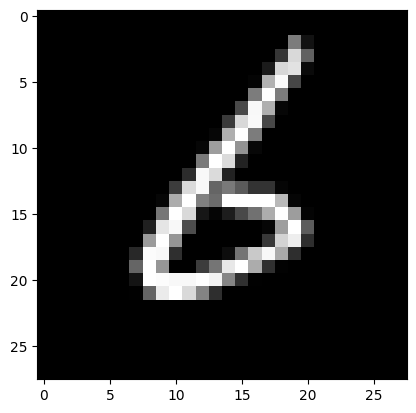

Predicted:  6


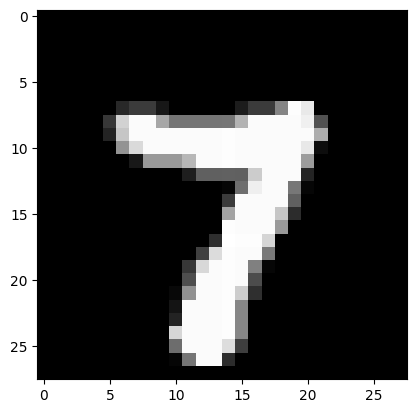

Predicted:  7


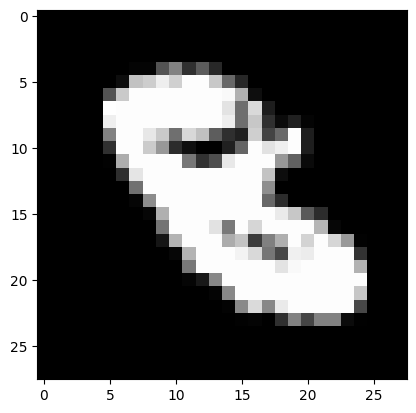

Predicted:  2


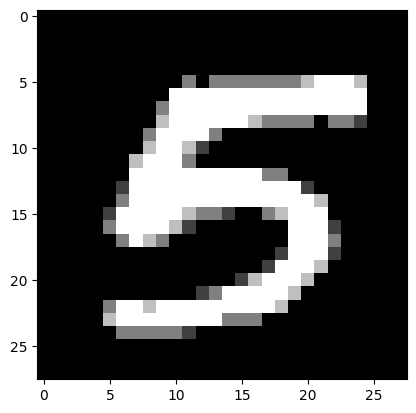

Predicted:  5


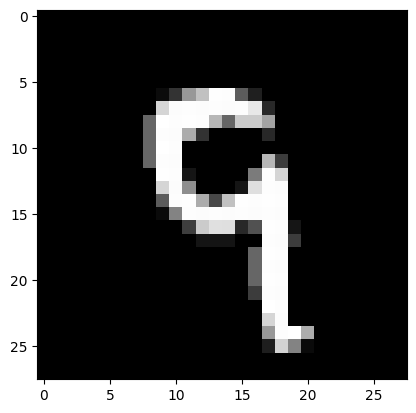

Predicted:  9


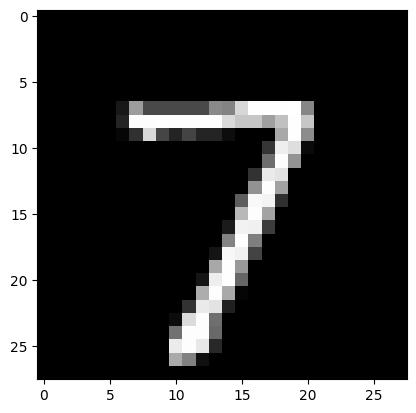

Predicted:  7


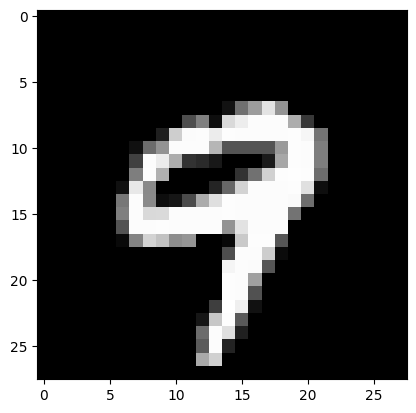

Predicted:  9


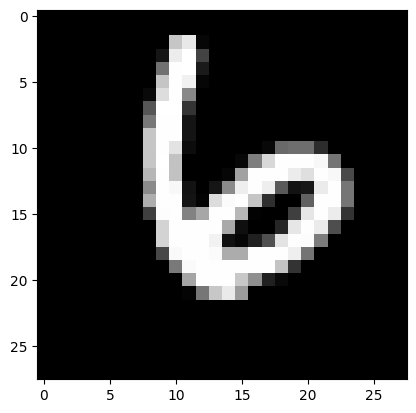

Predicted:  6


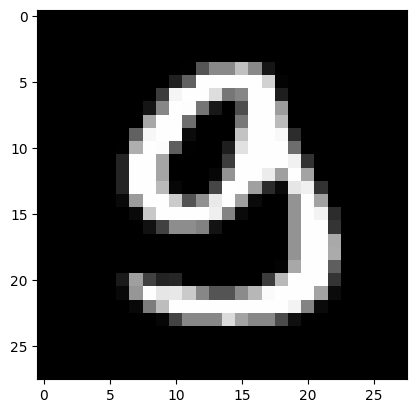

Predicted:  3


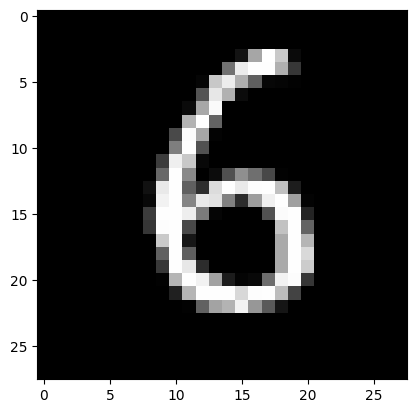

Predicted:  6


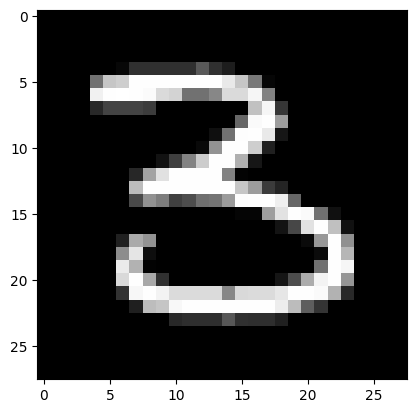

Predicted:  3


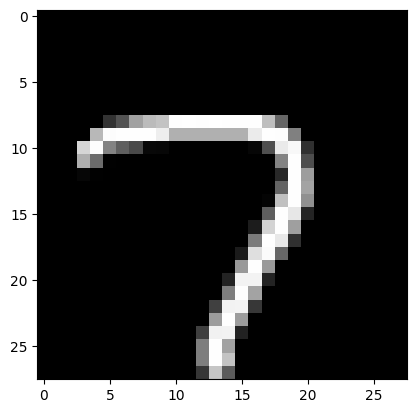

Predicted:  7


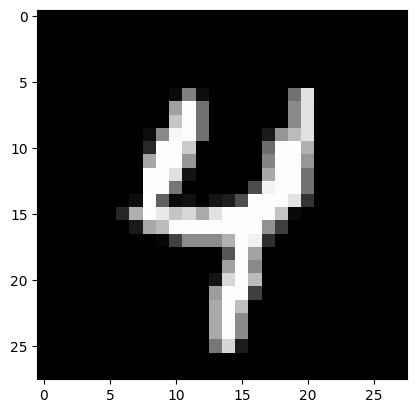

Predicted:  4


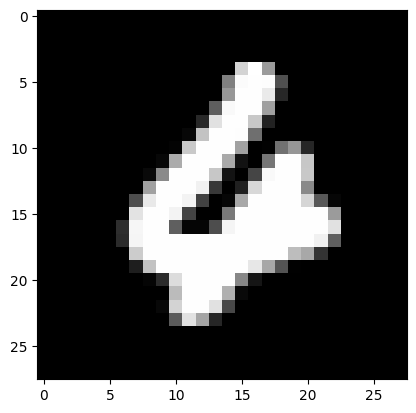

Predicted:  6


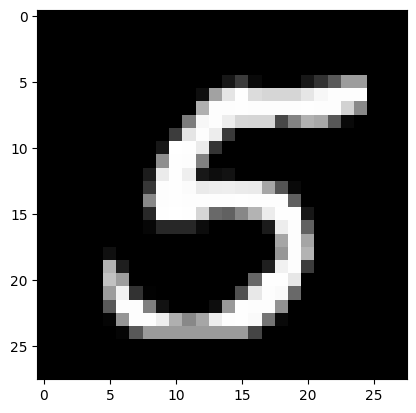

Predicted:  5


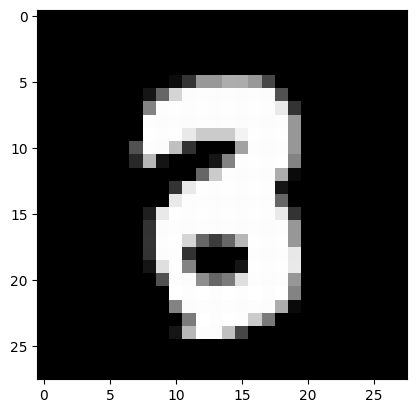

Predicted:  8


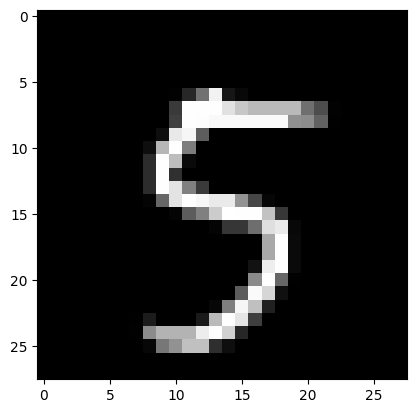

Predicted:  5


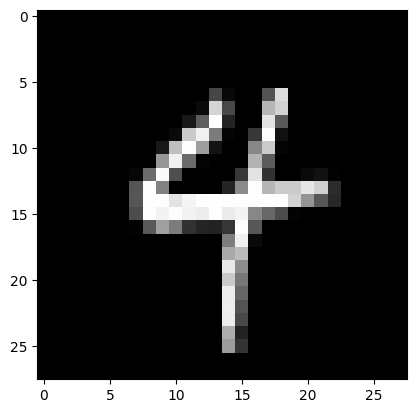

Predicted:  4


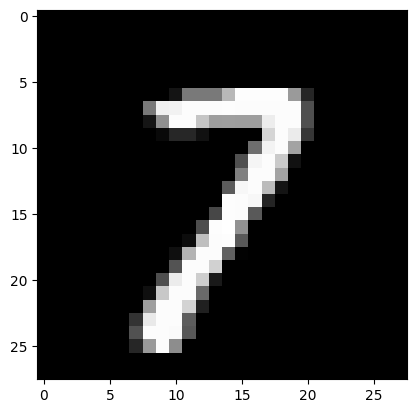

Predicted:  7


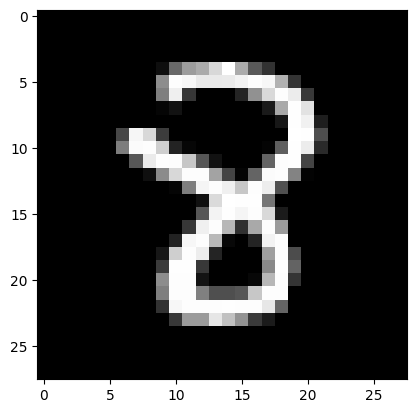

Predicted:  8


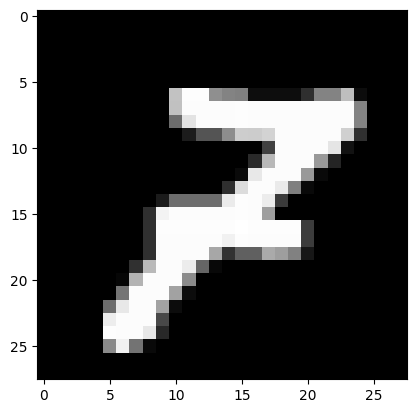

Predicted:  7


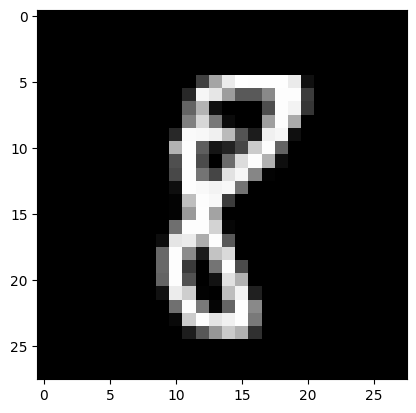

Predicted:  8


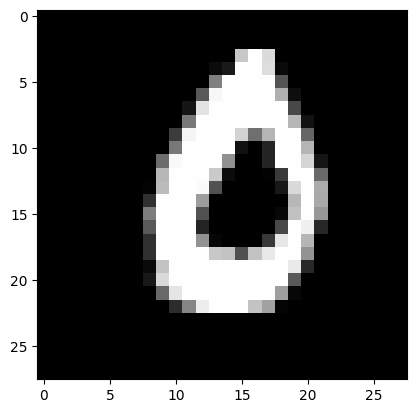

Predicted:  0


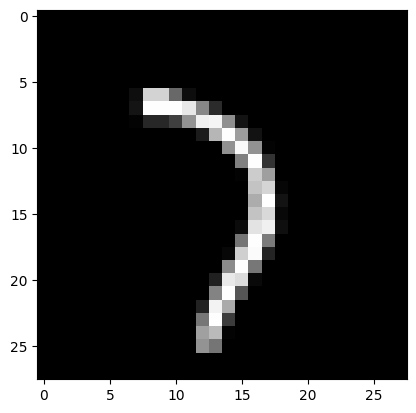

Predicted:  7


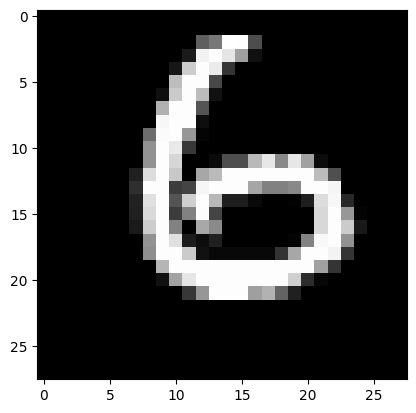

Predicted:  6


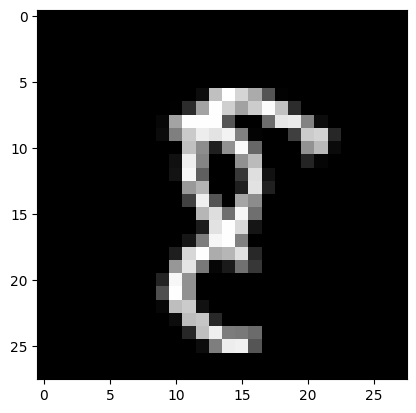

Predicted:  9


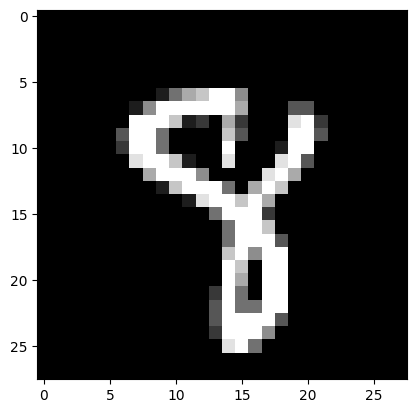

Predicted:  9


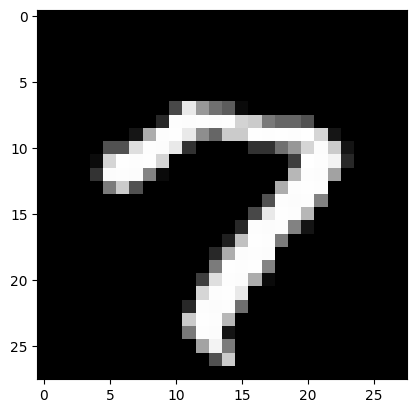

Predicted:  7


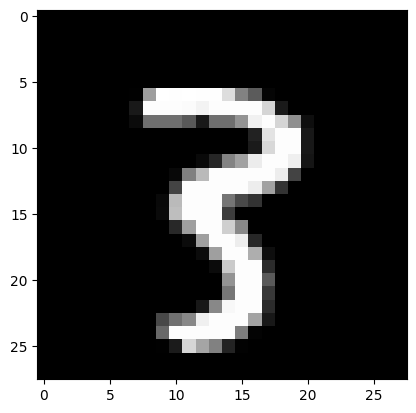

Predicted:  3


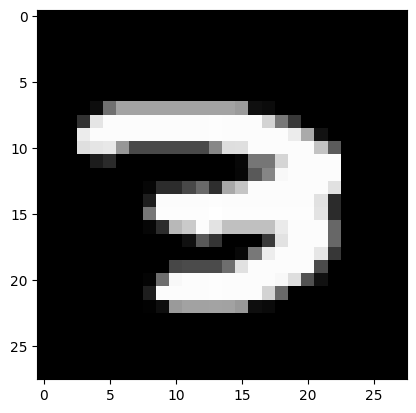

Predicted:  3


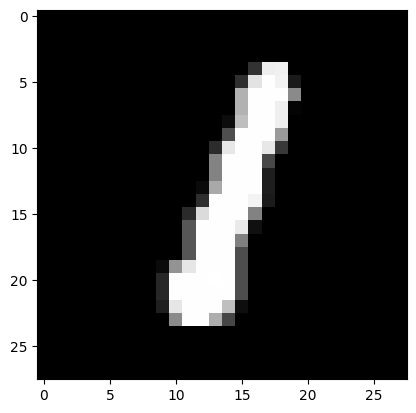

Predicted:  1


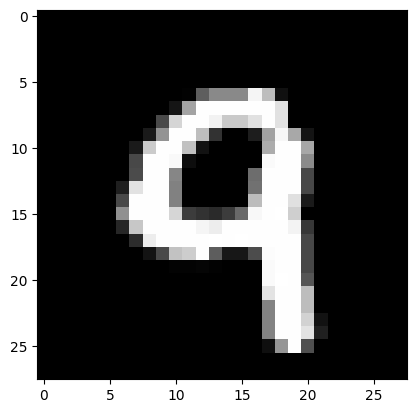

Predicted:  9


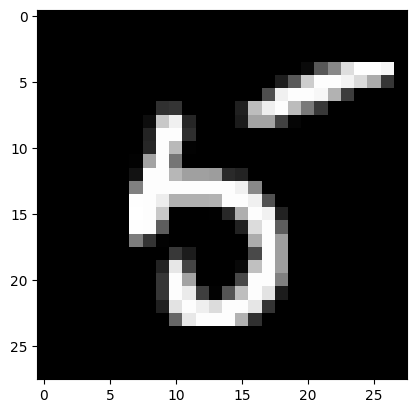

Predicted:  4


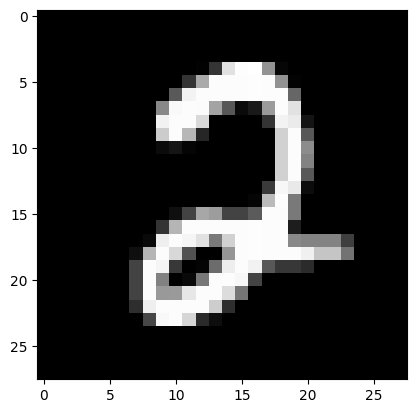

Predicted:  2


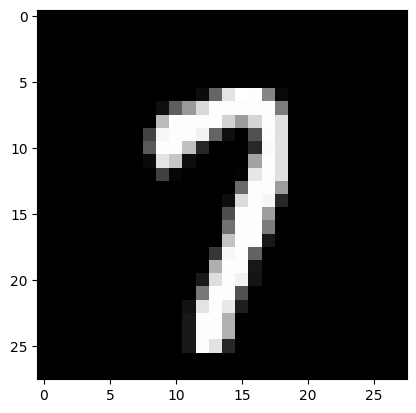

Predicted:  7


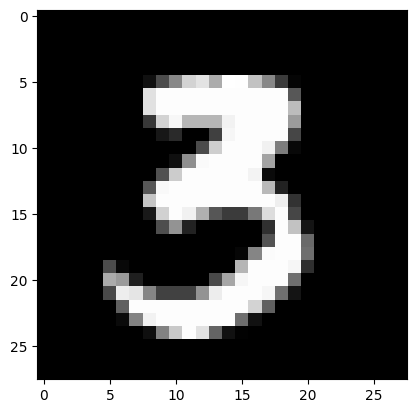

Predicted:  3


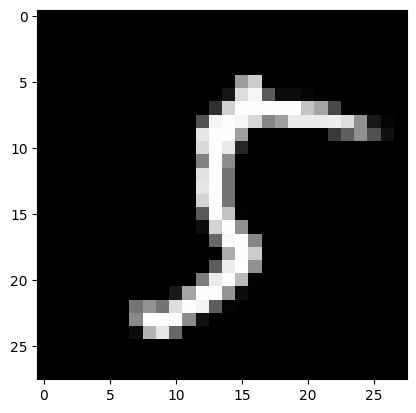

Predicted:  5


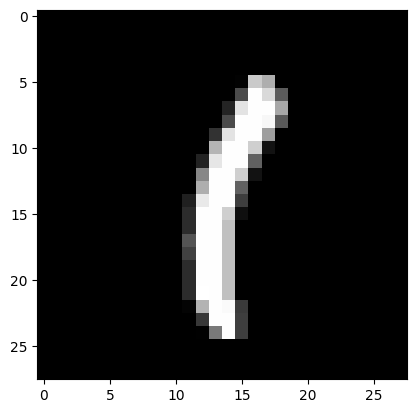

Predicted:  1


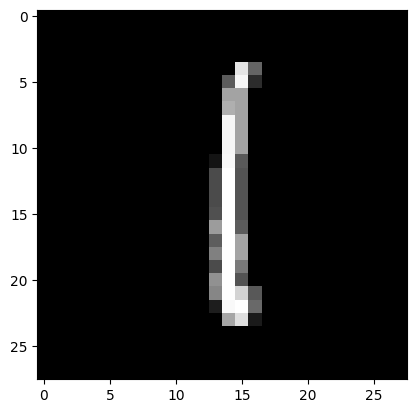

Predicted:  1


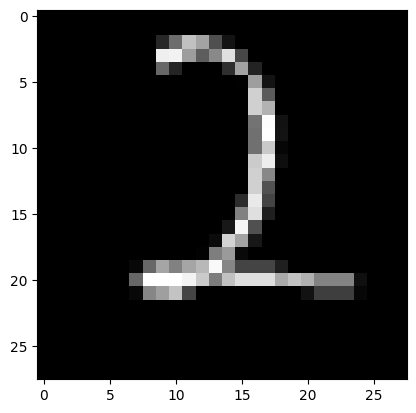

Predicted:  2


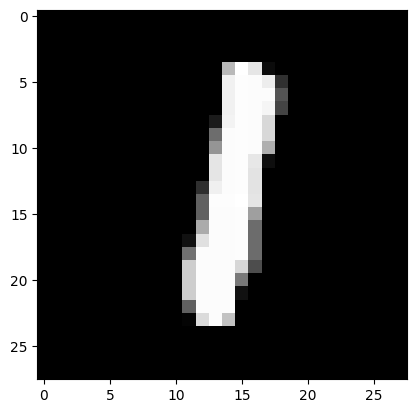

Predicted:  1


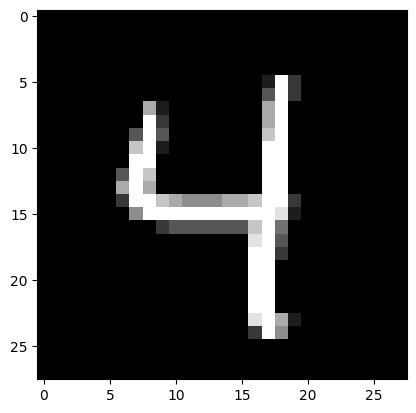

Predicted:  4


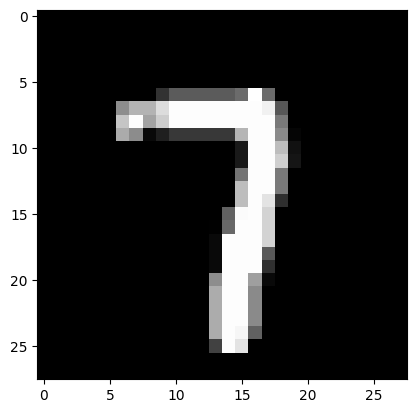

Predicted:  7


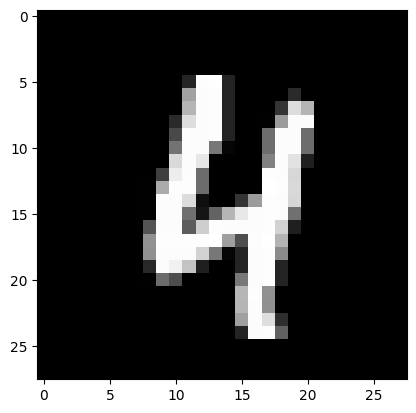

Predicted:  9


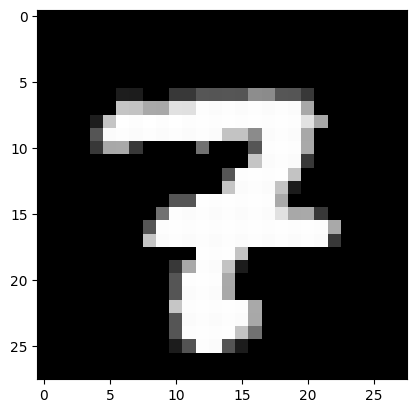

Predicted:  7


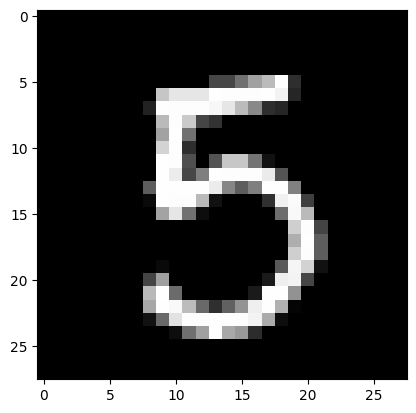

Predicted:  5


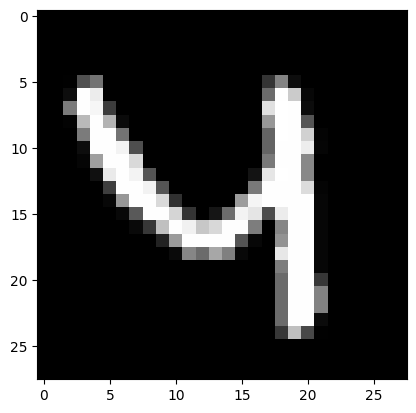

Predicted:  4


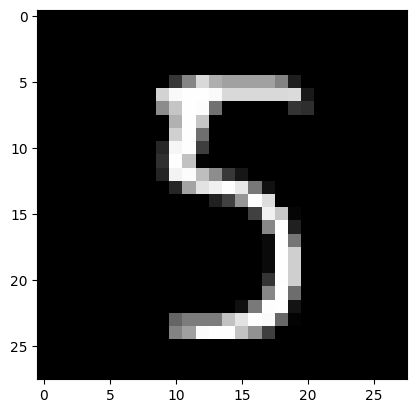

Predicted:  5


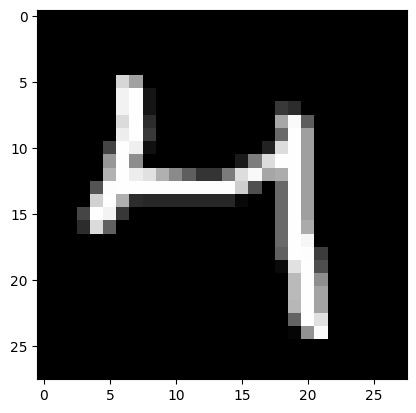

Predicted:  9


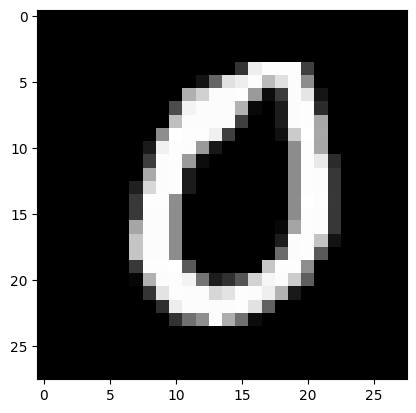

Predicted:  0


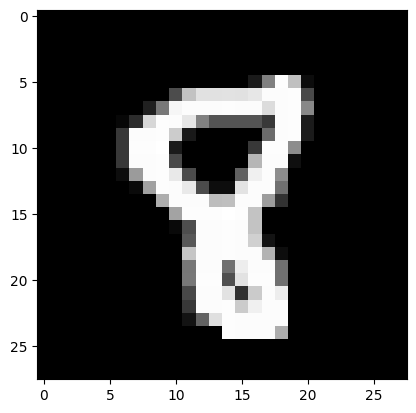

Predicted:  8


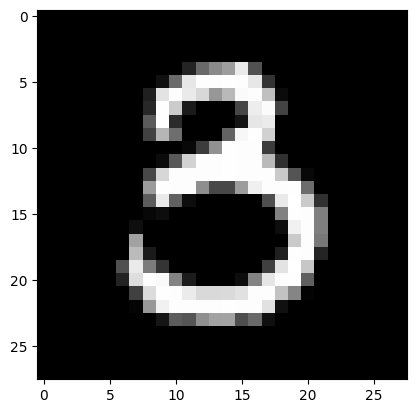

Predicted:  3


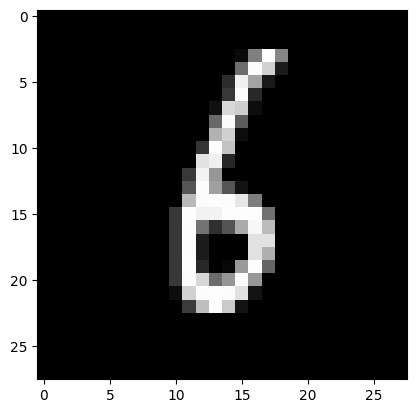

Predicted:  6


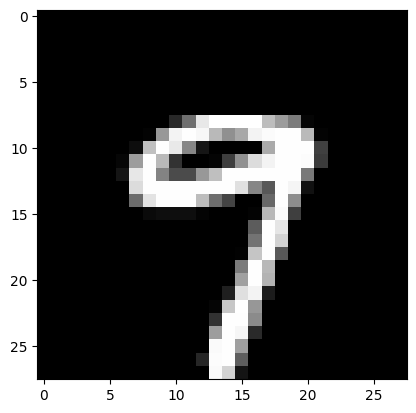

Predicted:  9


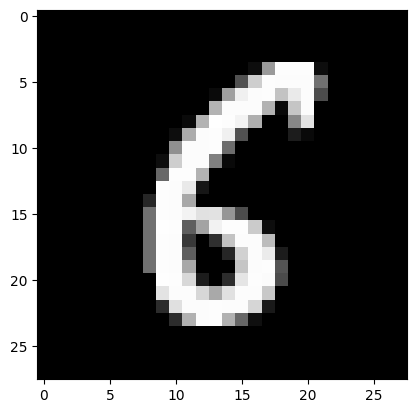

Predicted:  0


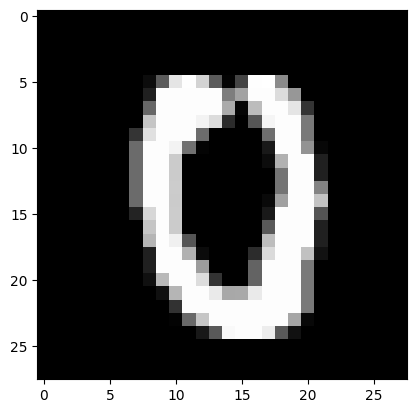

Predicted:  0


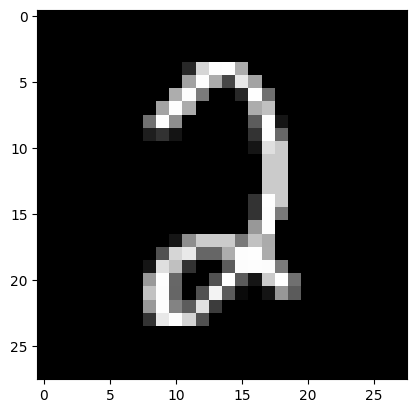

Predicted:  2


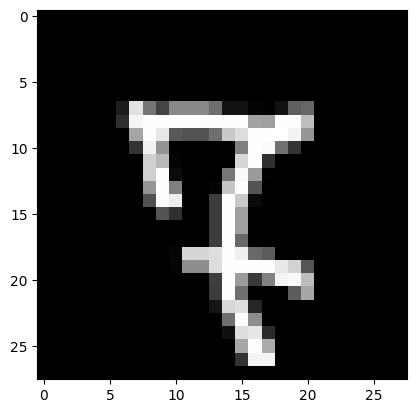

Predicted:  7


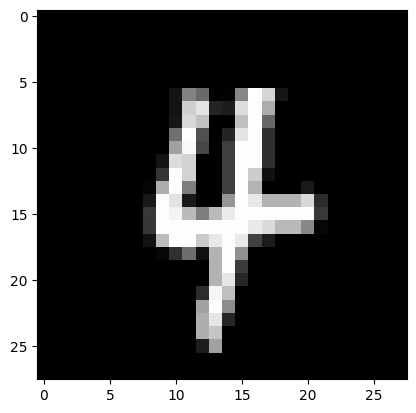

Predicted:  4


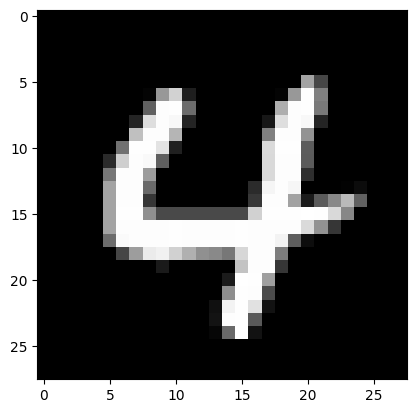

Predicted:  4


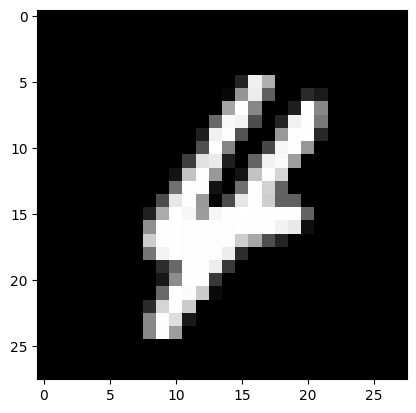

Predicted:  9


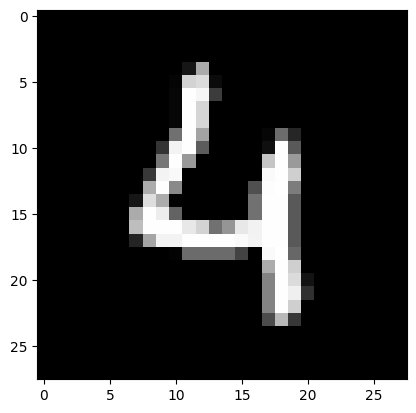

Predicted:  4


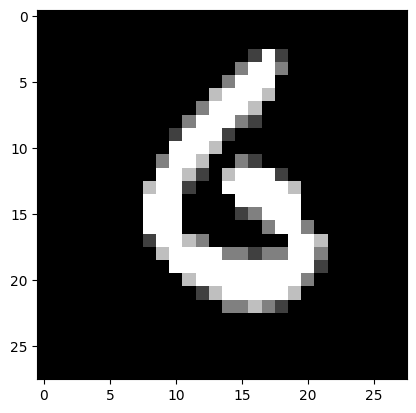

Predicted:  6


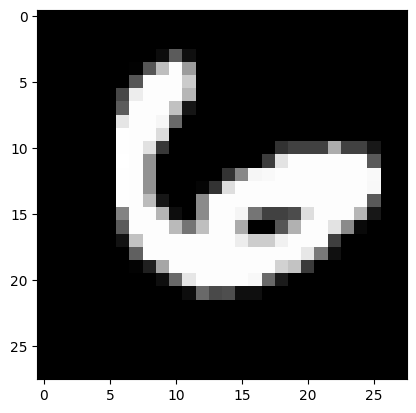

Predicted:  6


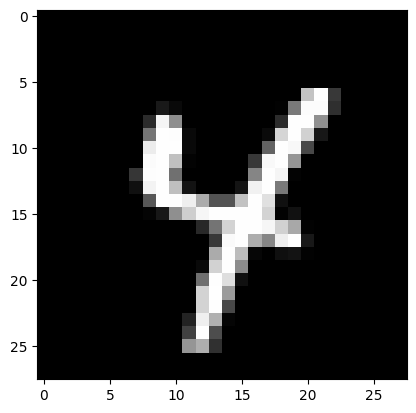

Predicted:  4


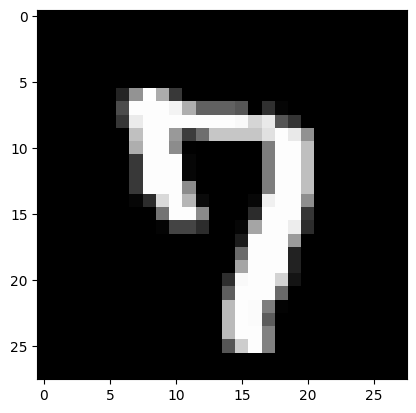

Predicted:  7


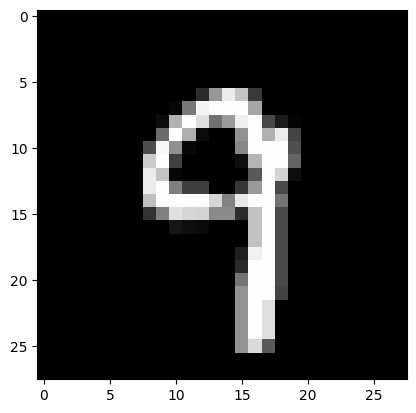

Predicted:  9


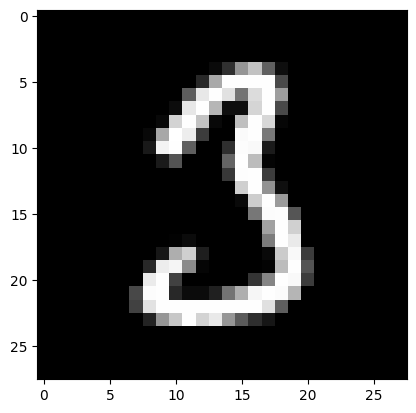

Predicted:  3


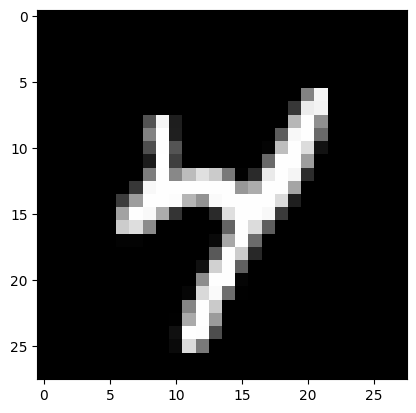

Predicted:  4


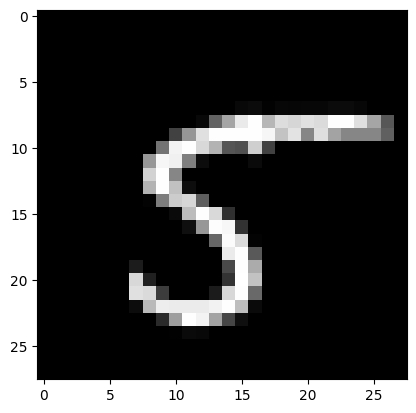

Predicted:  5


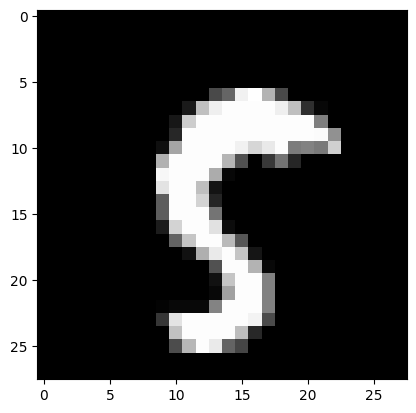

Predicted:  9


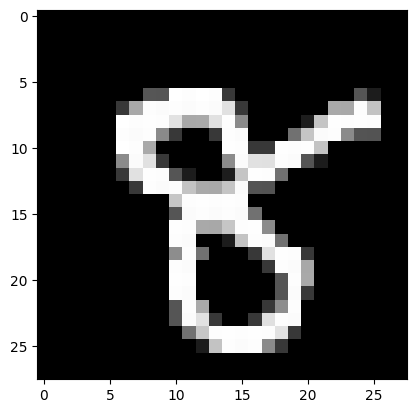

Predicted:  8


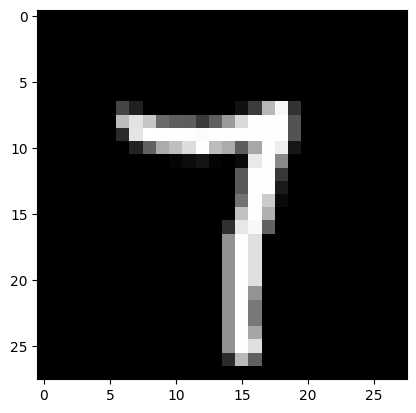

Predicted:  7


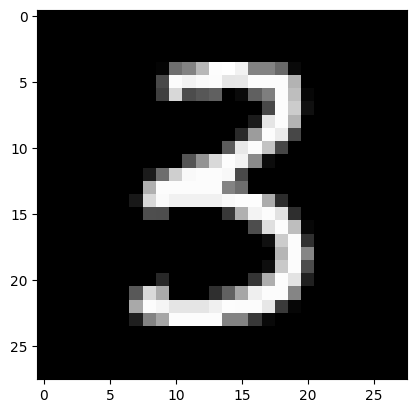

Predicted:  3


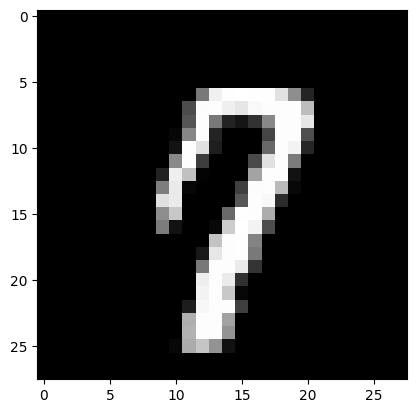

Predicted:  9


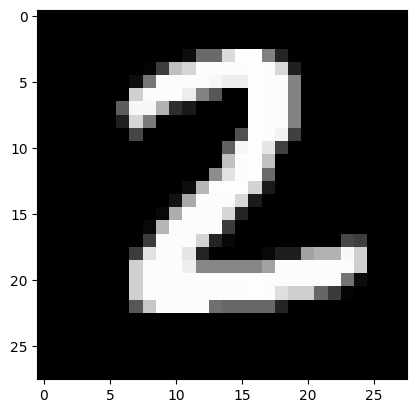

Predicted:  2


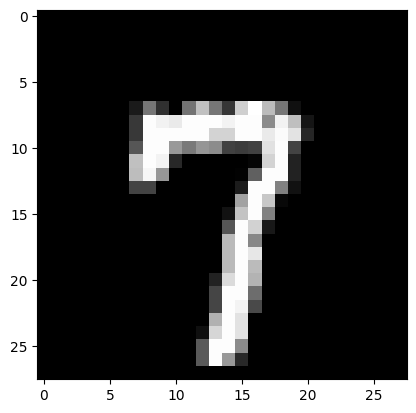

Predicted:  7


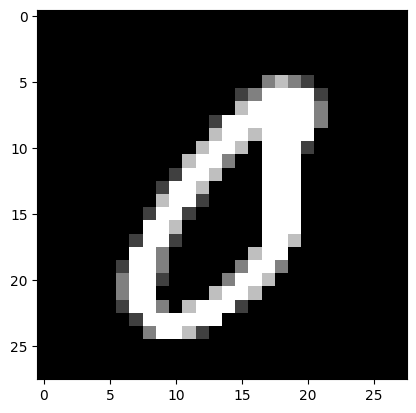

Predicted:  0


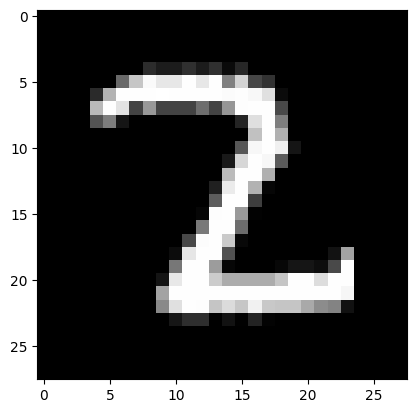

Predicted:  2


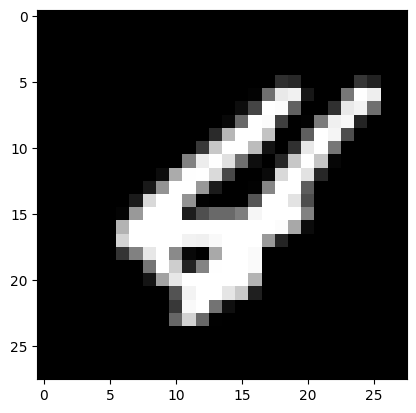

Predicted:  4


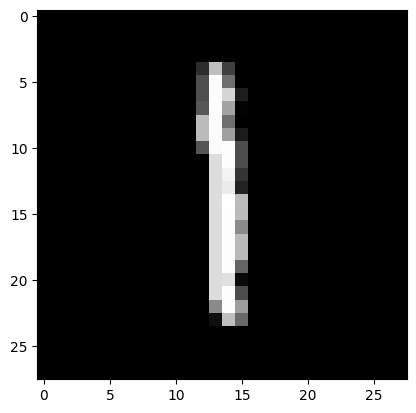

Predicted:  1


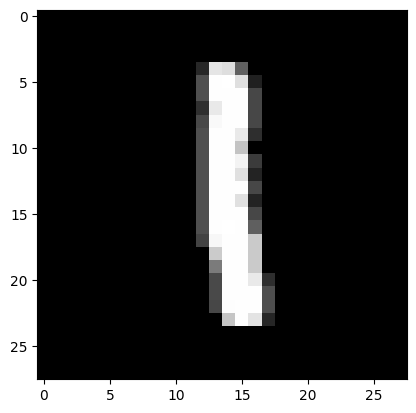

Predicted:  1


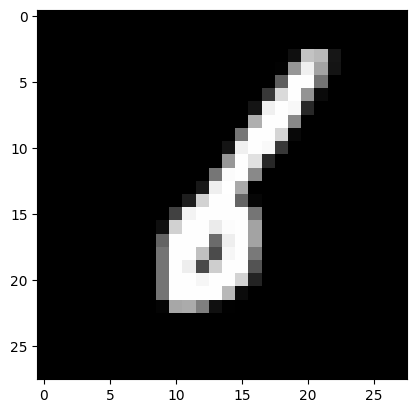

Predicted:  1


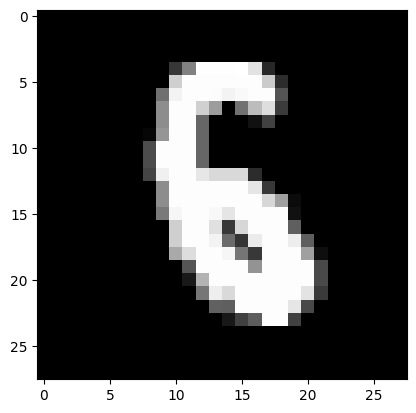

Predicted:  6


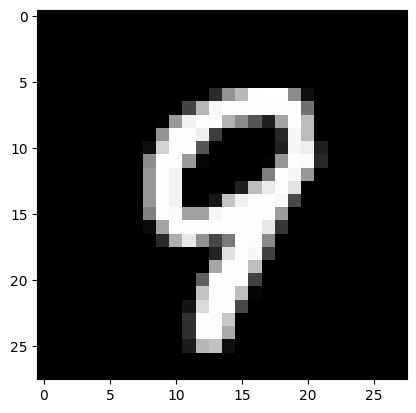

Predicted:  9


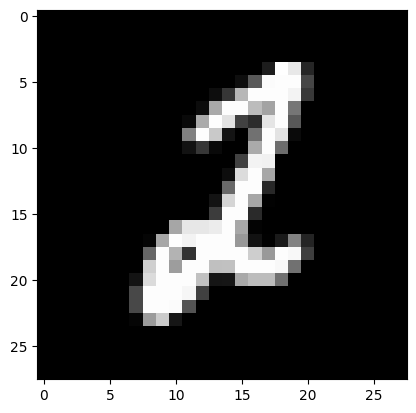

Predicted:  2


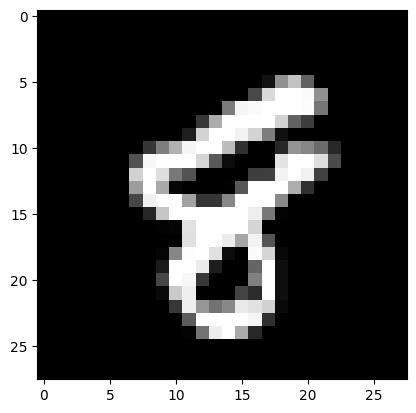

Predicted:  9


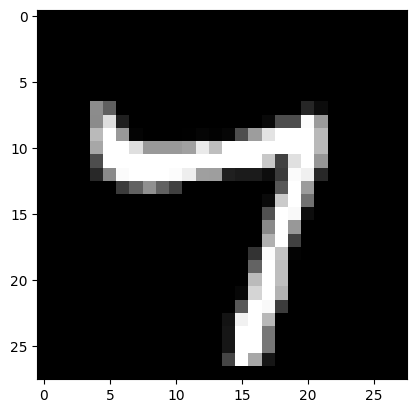

Predicted:  7


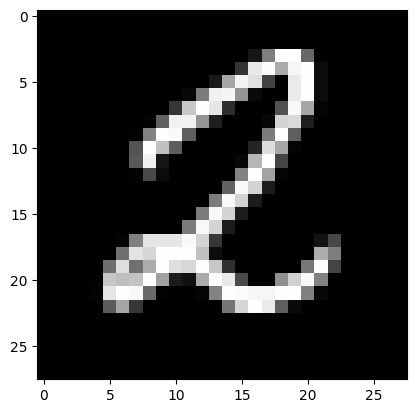

Predicted:  2


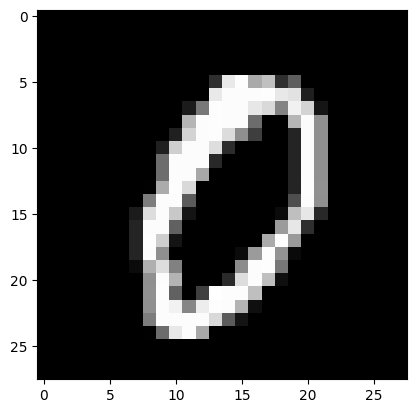

Predicted:  0


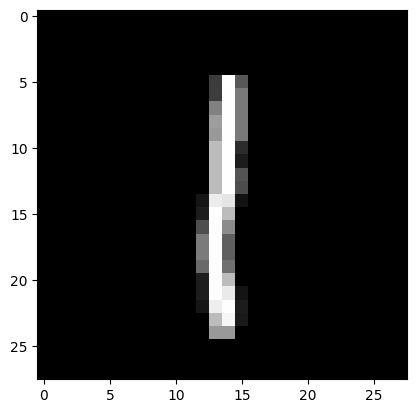

Predicted:  1


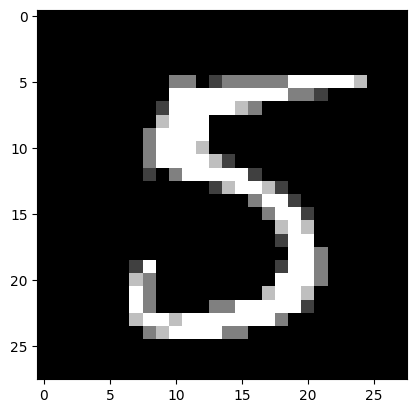

Predicted:  5


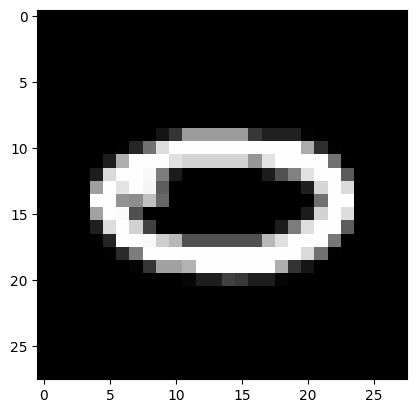

Predicted:  6


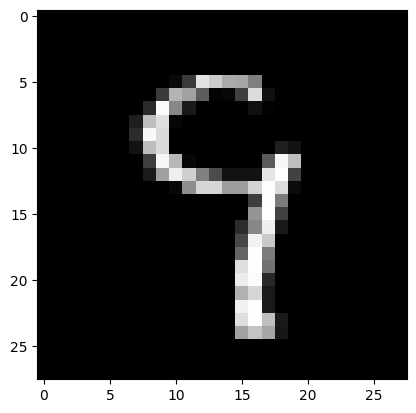

Predicted:  4


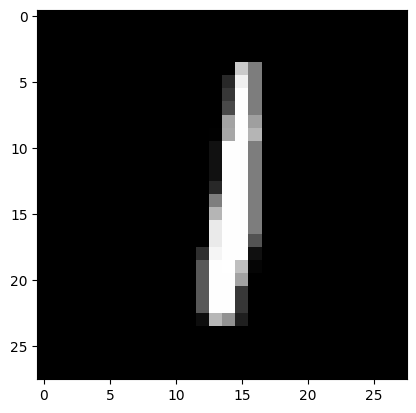

Predicted:  1


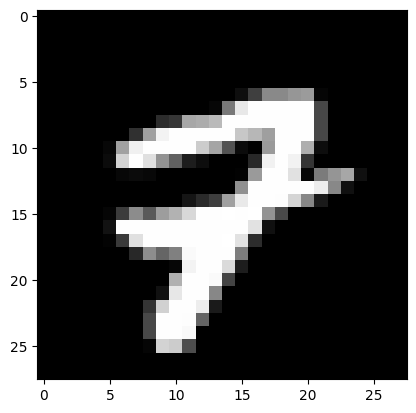

Predicted:  7


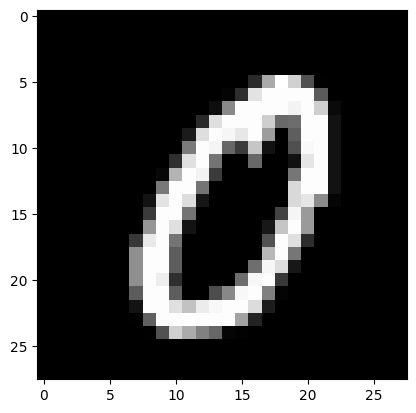

Predicted:  0


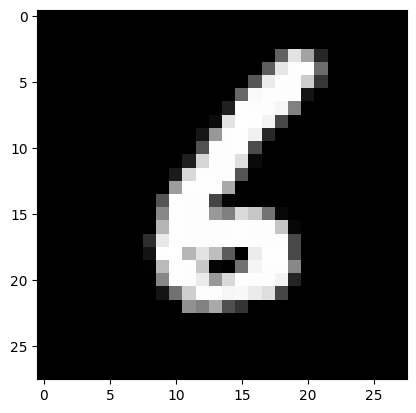

Predicted:  6


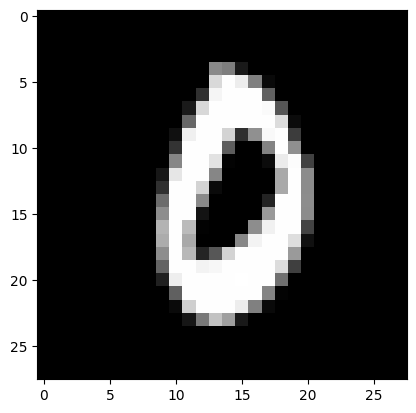

Predicted:  0


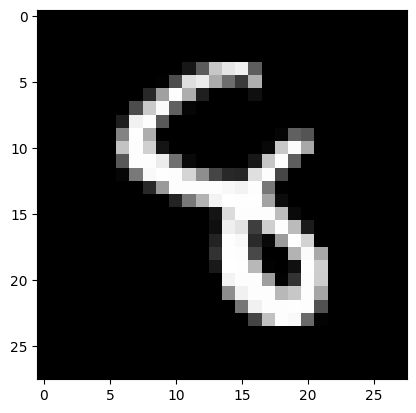

Predicted:  4


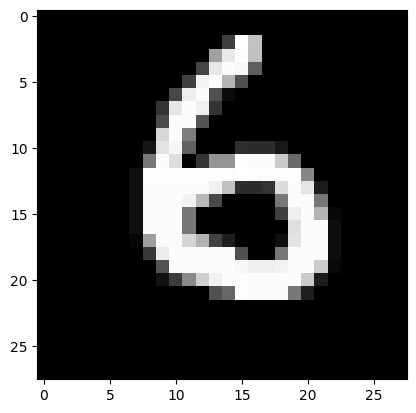

Predicted:  6


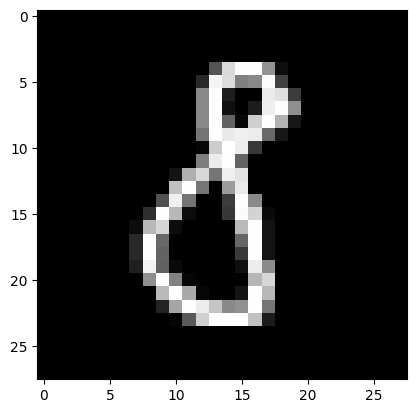

Predicted:  5


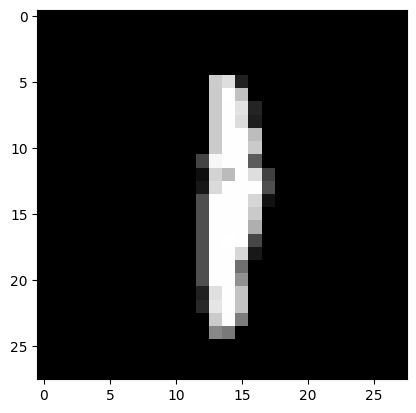

Predicted:  1


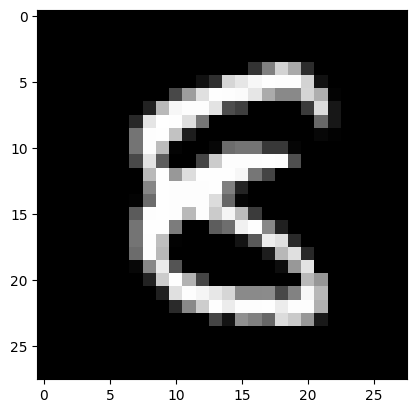

Predicted:  8


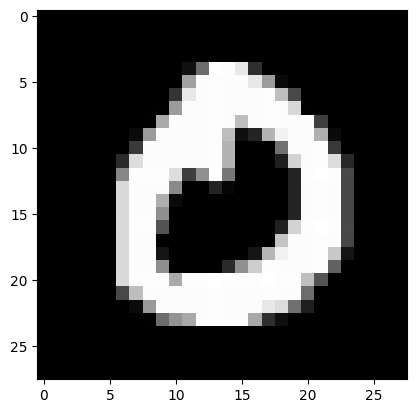

Predicted:  0


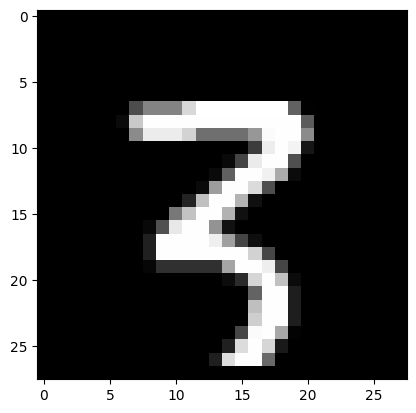

Predicted:  9


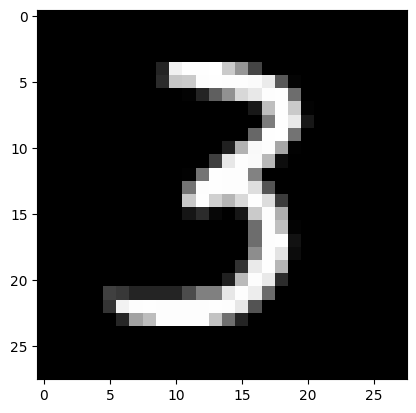

Predicted:  3


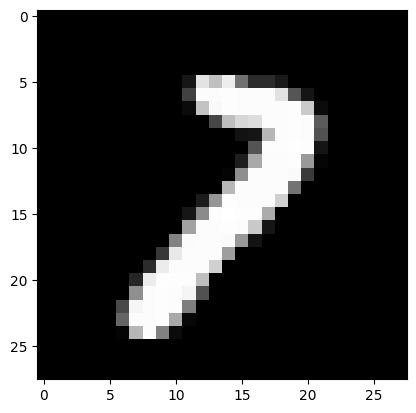

Predicted:  7


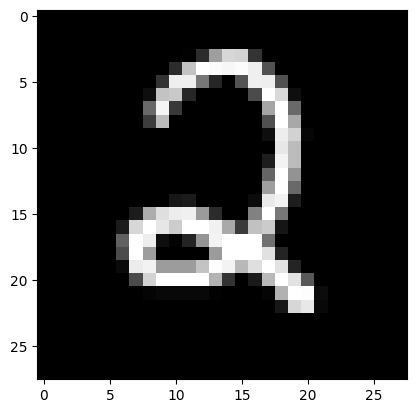

Predicted:  2


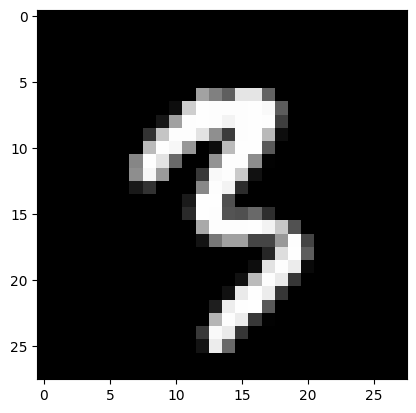

Predicted:  7


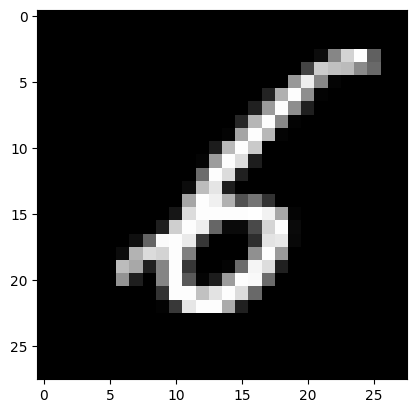

Predicted:  8


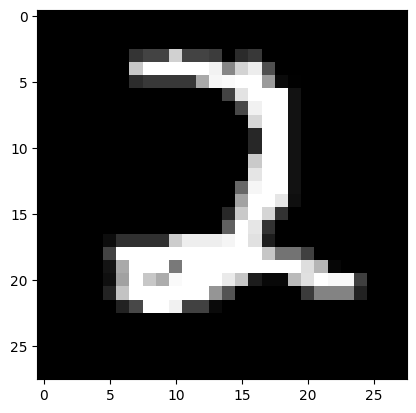

Predicted:  2


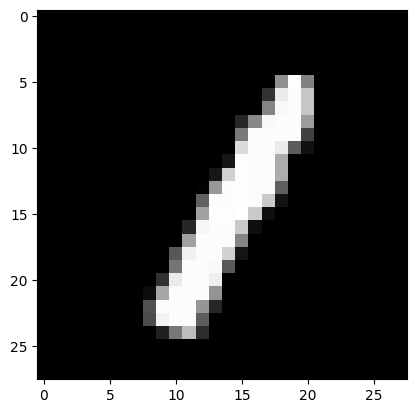

Predicted:  1


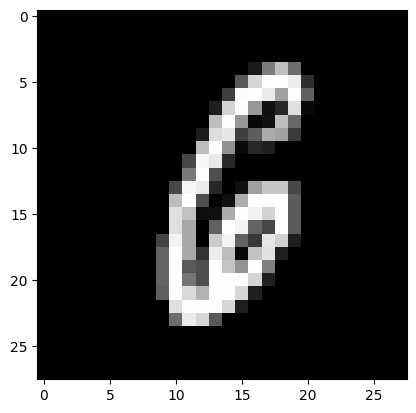

Predicted:  6


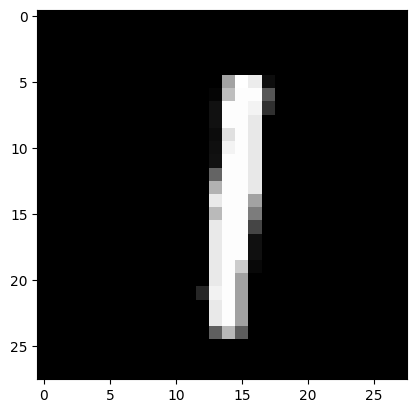

Predicted:  1


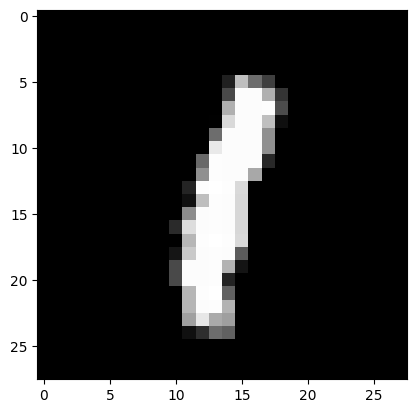

Predicted:  1


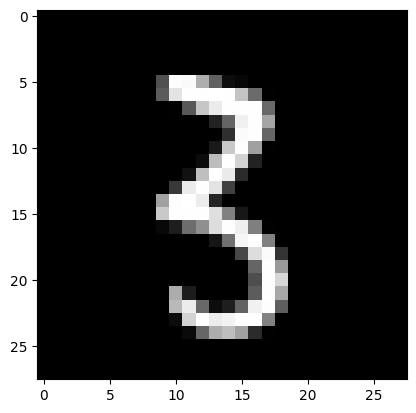

Predicted:  3


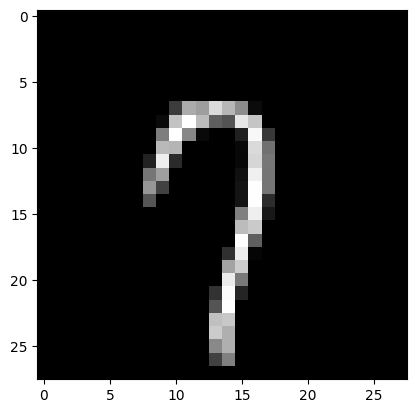

Predicted:  7


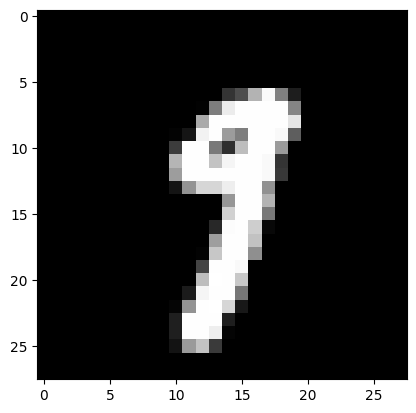

Predicted:  9


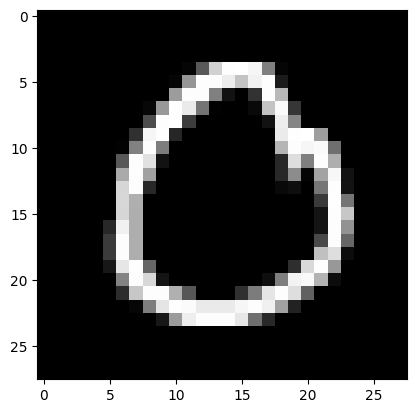

Predicted:  0


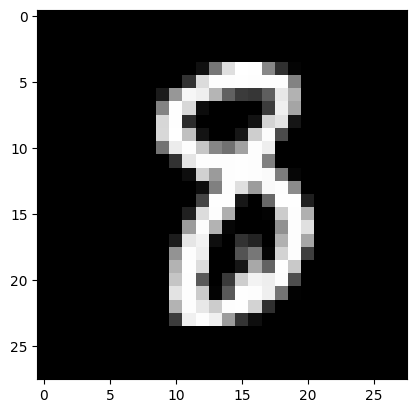

Predicted:  8


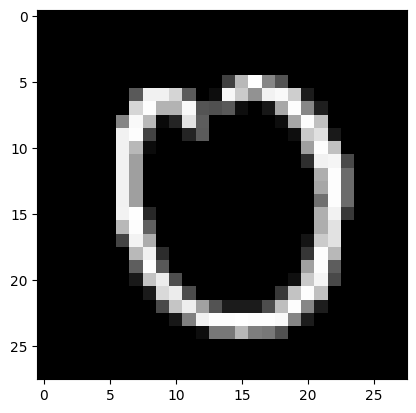

Predicted:  0


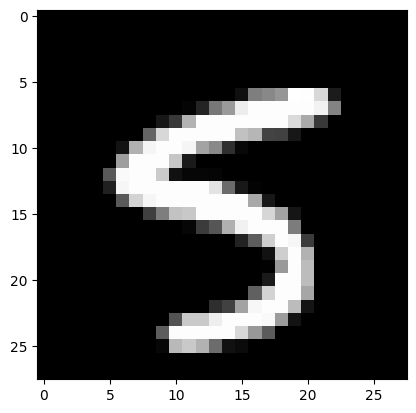

Predicted:  9


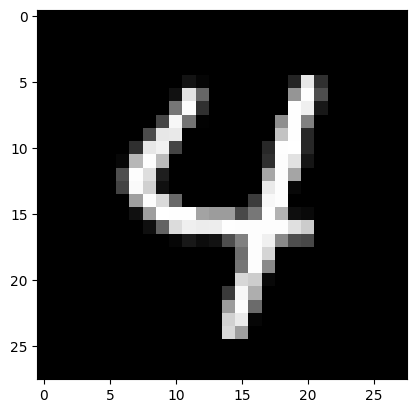

Predicted:  4


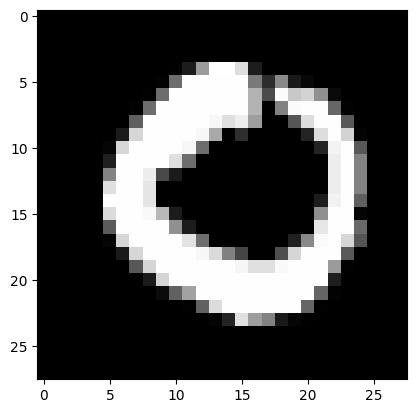

Predicted:  0


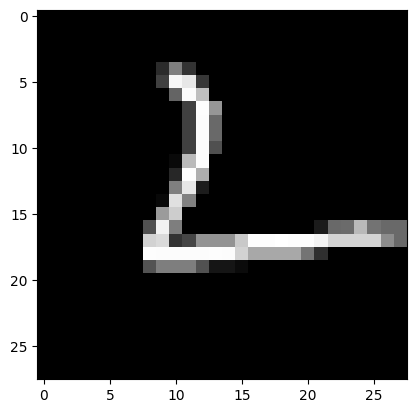

Predicted:  6


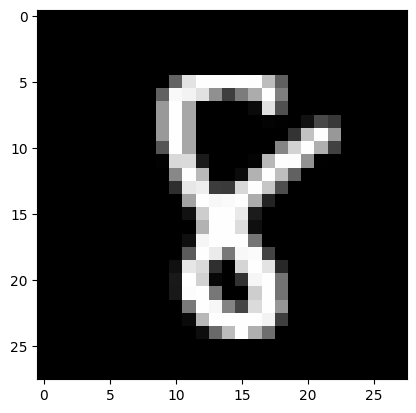

Predicted:  8


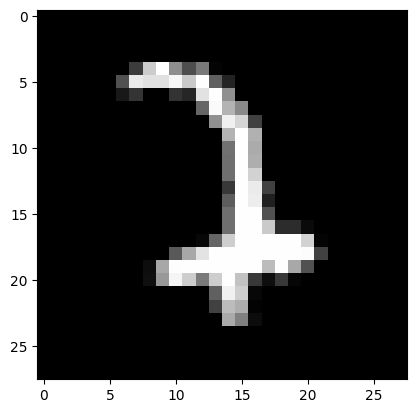

Predicted:  2


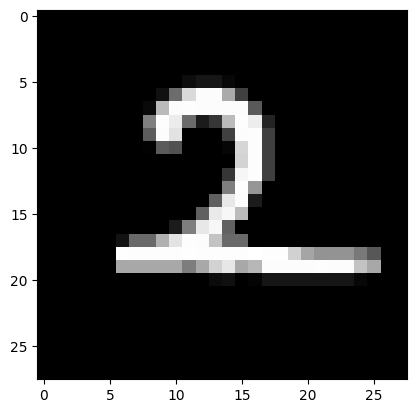

Predicted:  2


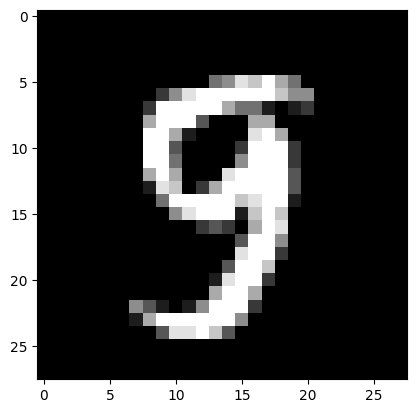

Predicted:  3


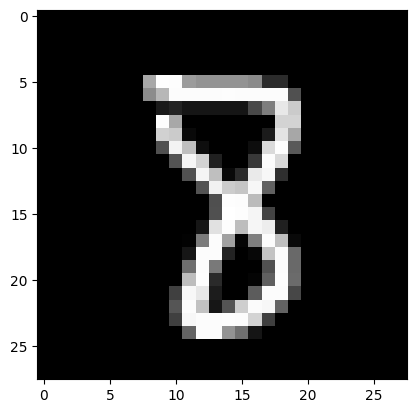

Predicted:  8


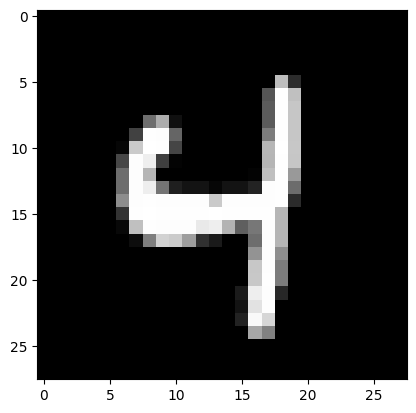

Predicted:  4


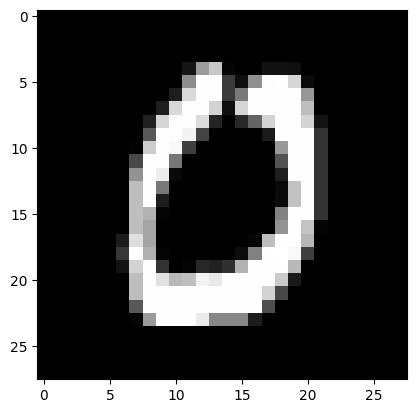

Predicted:  0


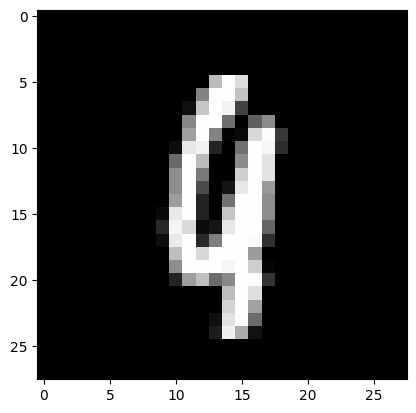

Predicted:  8


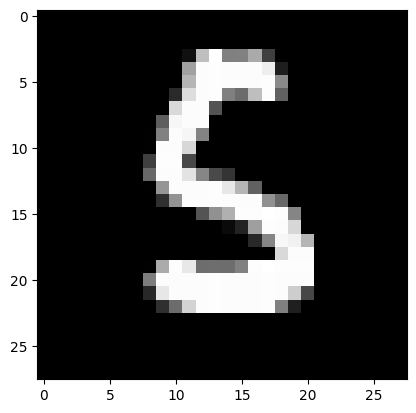

Predicted:  6


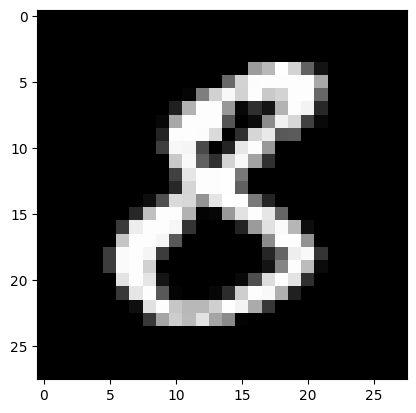

Predicted:  5


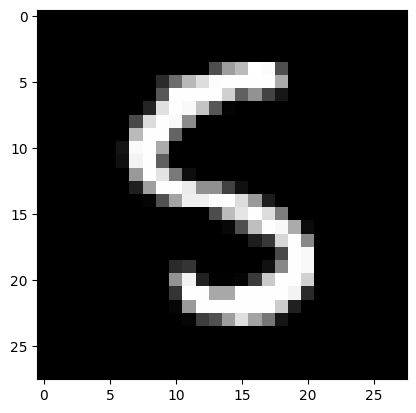

Predicted:  5


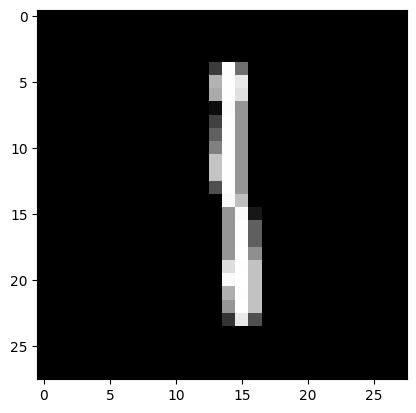

Predicted:  1


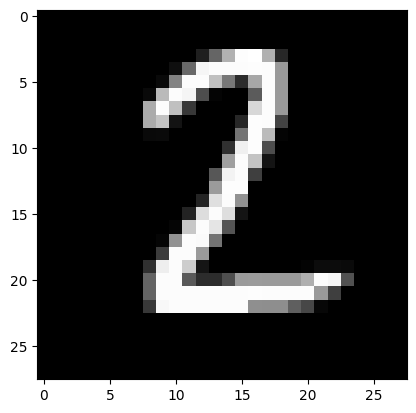

Predicted:  2


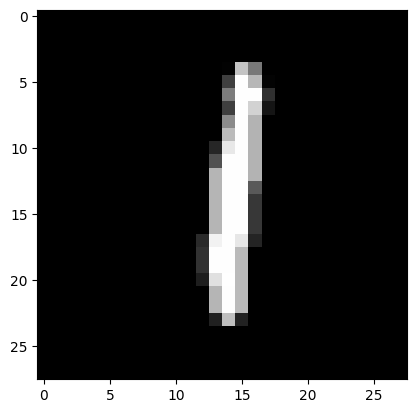

Predicted:  1


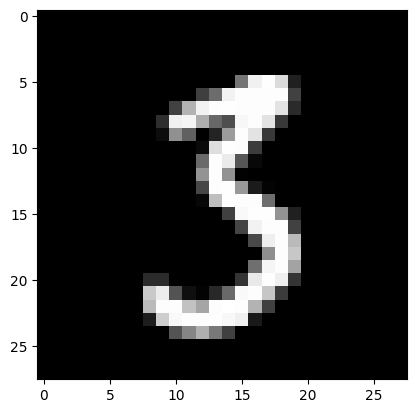

Predicted:  3


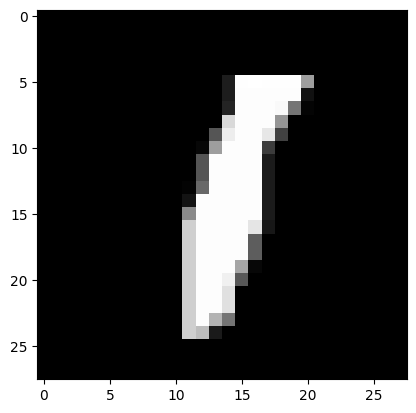

Predicted:  1


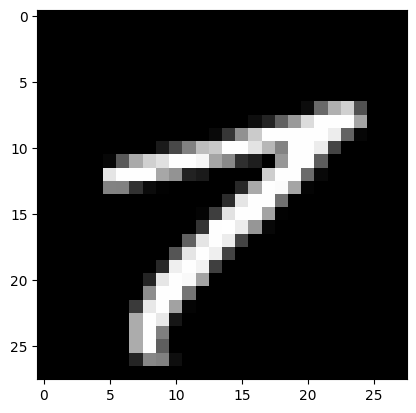

Predicted:  7


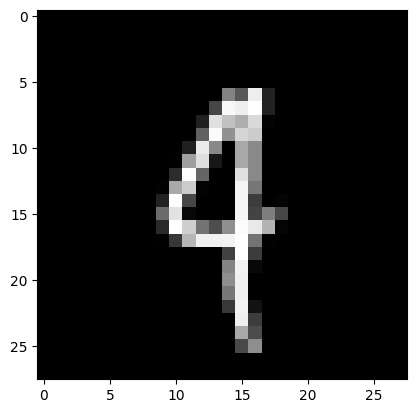

Predicted:  9


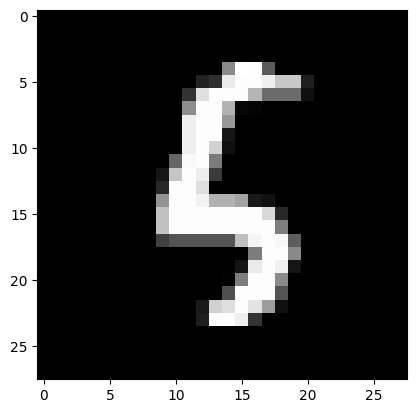

Predicted:  5


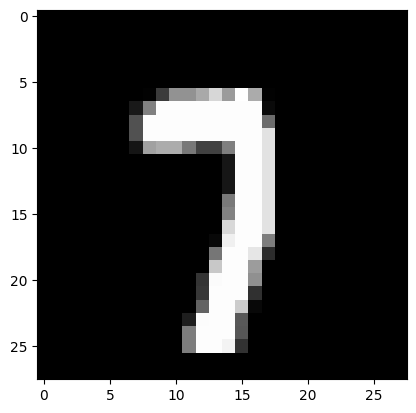

Predicted:  7


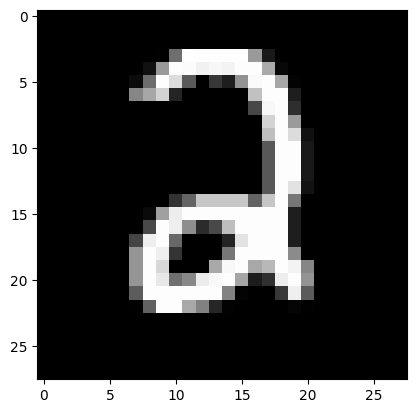

Predicted:  2


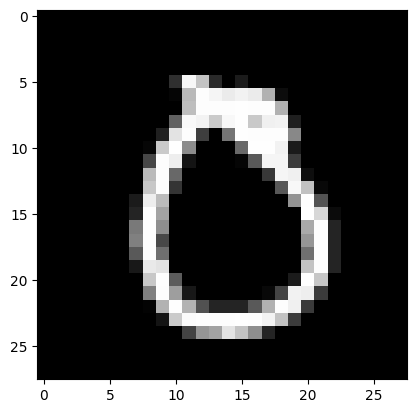

Predicted:  0


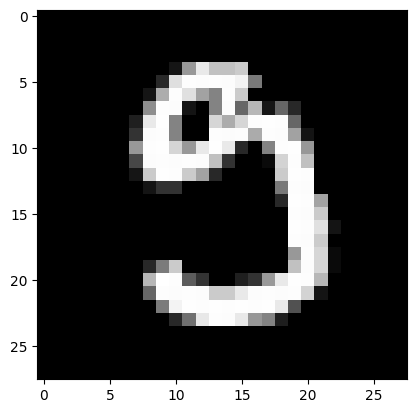

Predicted:  0


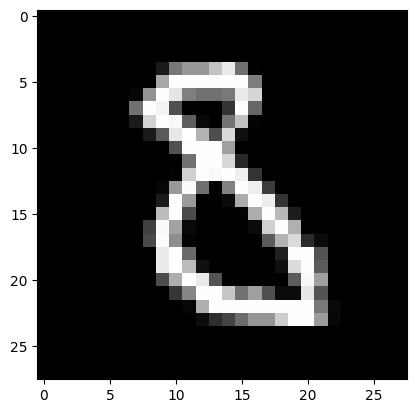

Predicted:  6


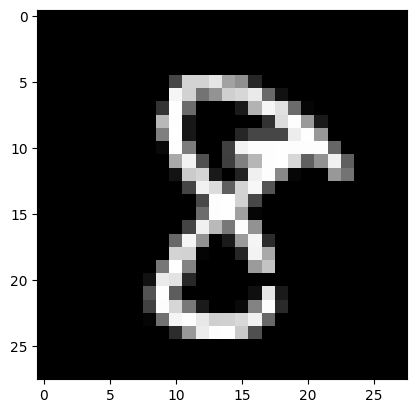

Predicted:  8


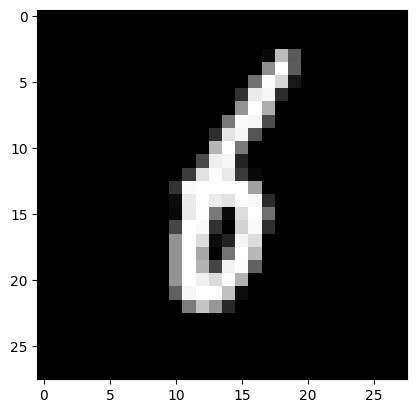

Predicted:  6


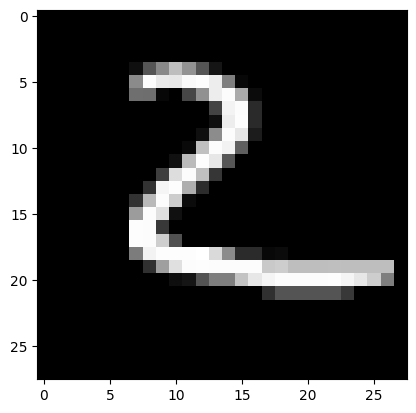

Predicted:  6


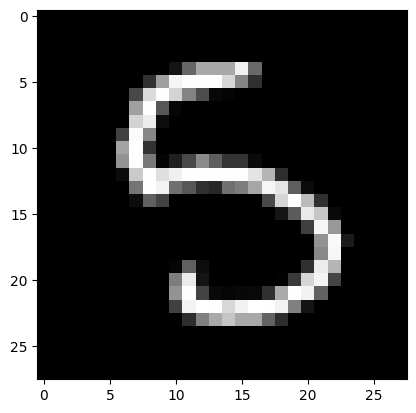

Predicted:  5


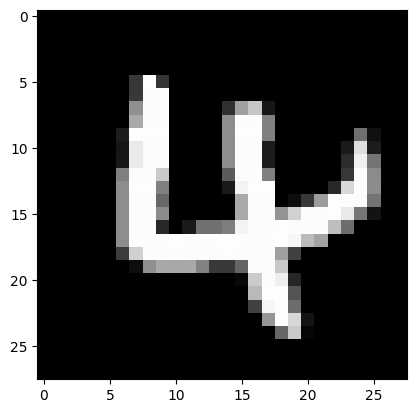

Predicted:  6


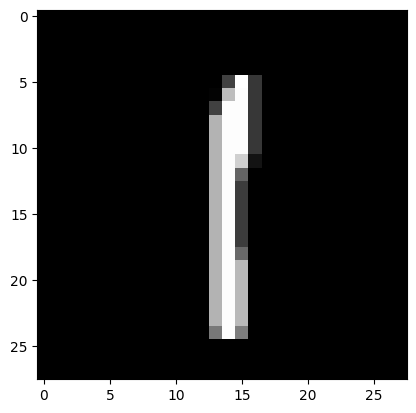

Predicted:  1


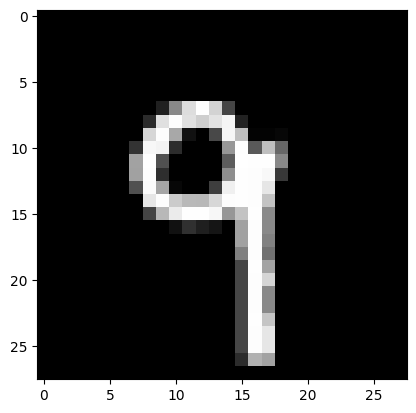

Predicted:  9


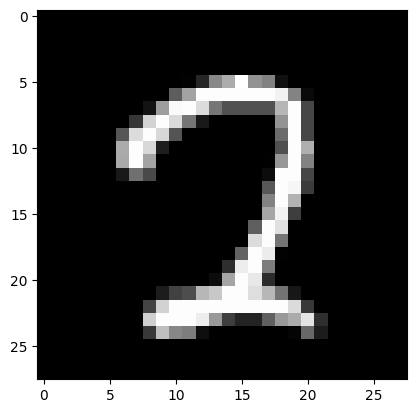

Predicted:  7


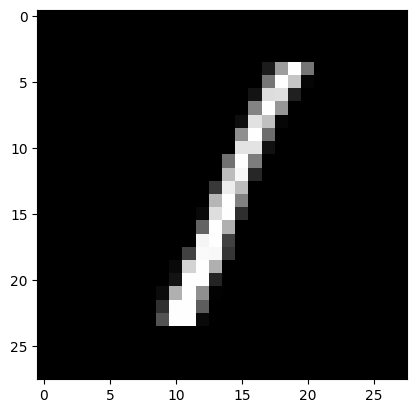

Predicted:  1


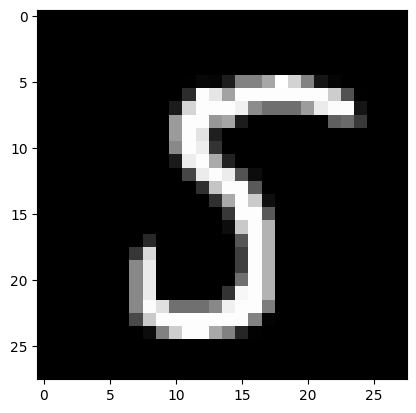

Predicted:  5


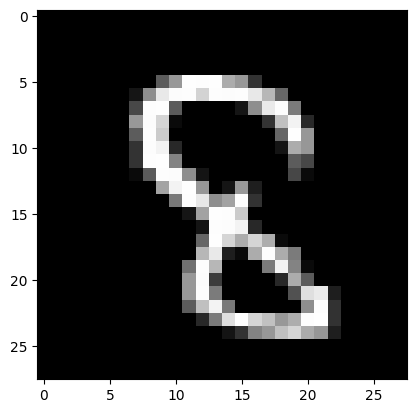

Predicted:  2


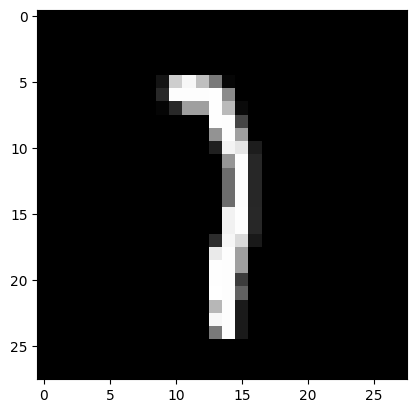

Predicted:  1


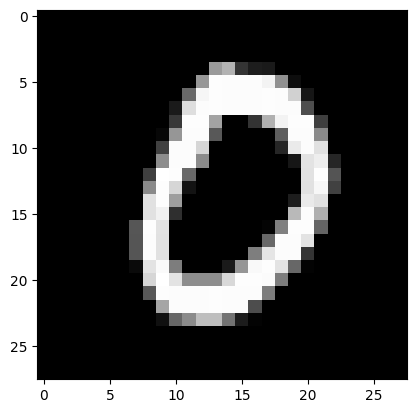

Predicted:  0


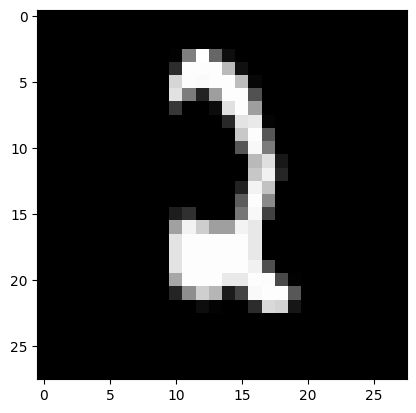

Predicted:  2


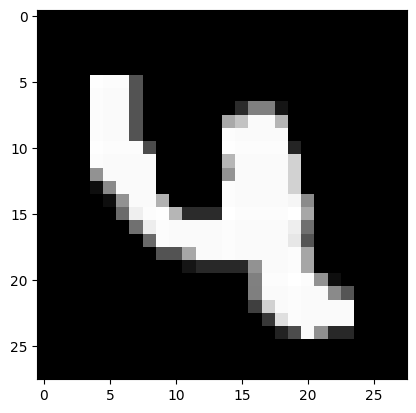

Predicted:  4


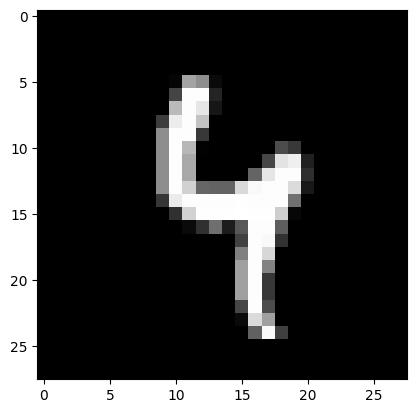

Predicted:  4


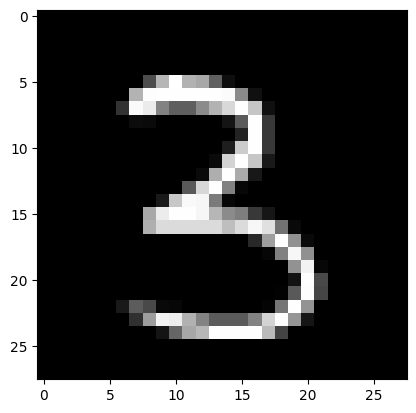

Predicted:  3


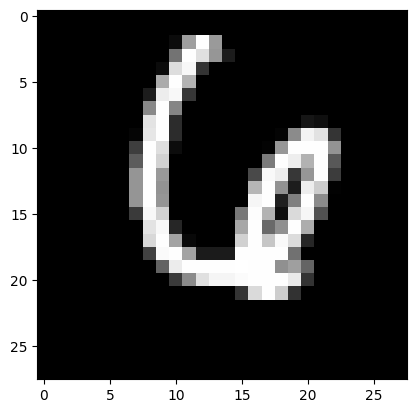

Predicted:  6


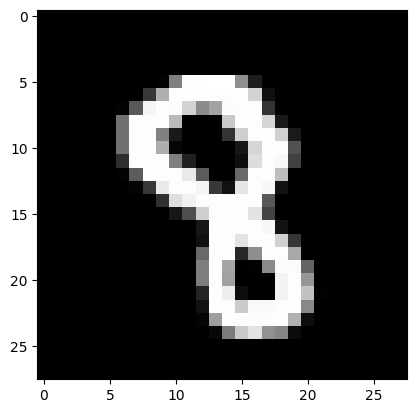

Predicted:  8


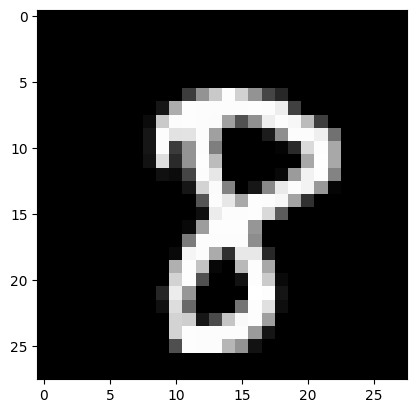

Predicted:  8


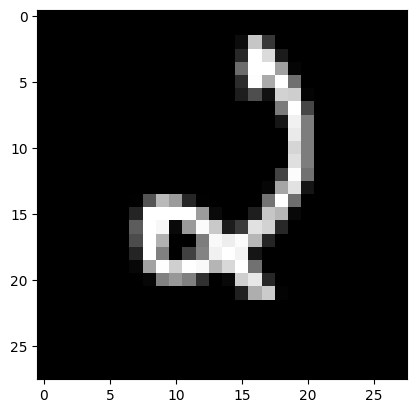

Predicted:  2


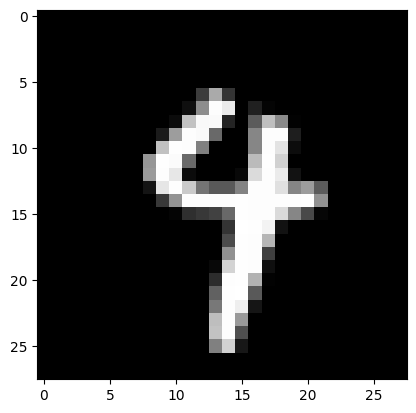

Predicted:  4


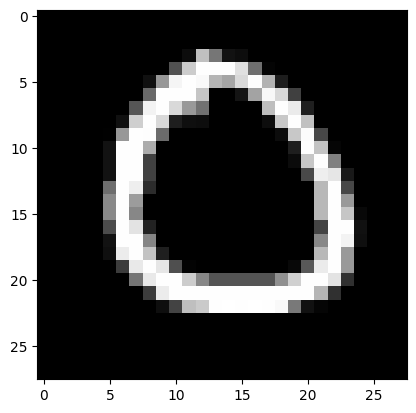

Predicted:  0


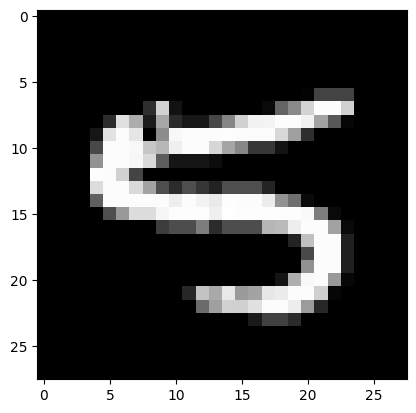

Predicted:  4


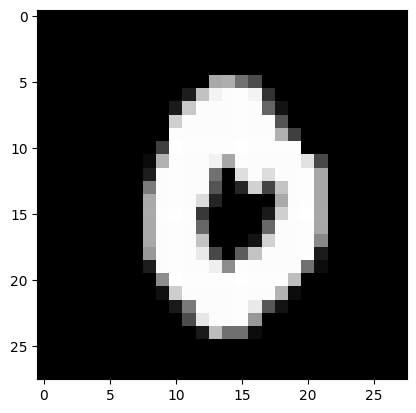

Predicted:  0


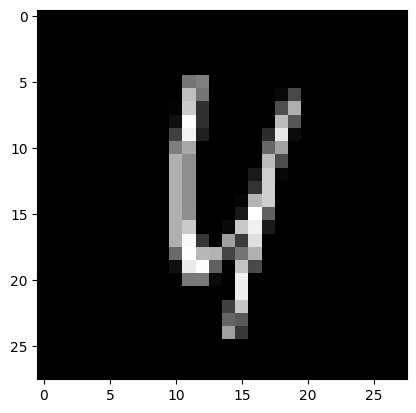

Predicted:  4


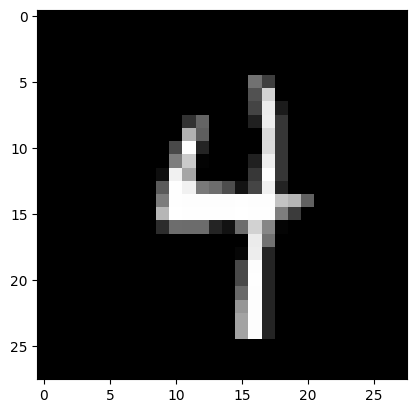

Predicted:  4


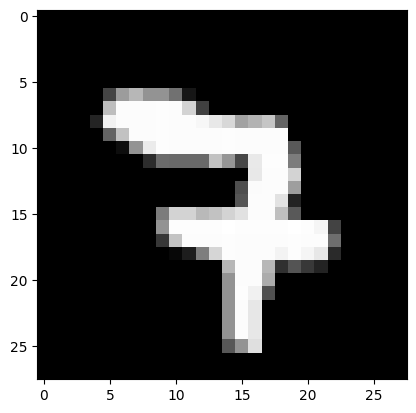

Predicted:  7


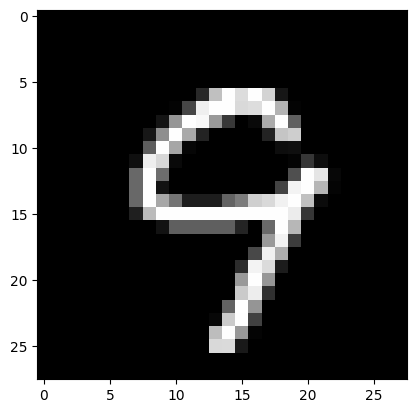

Predicted:  9


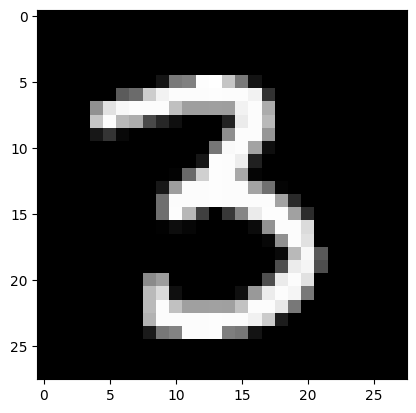

Predicted:  3


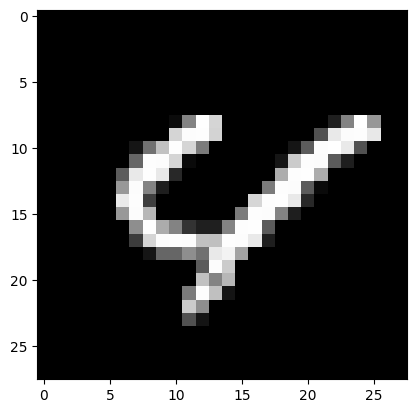

Predicted:  4


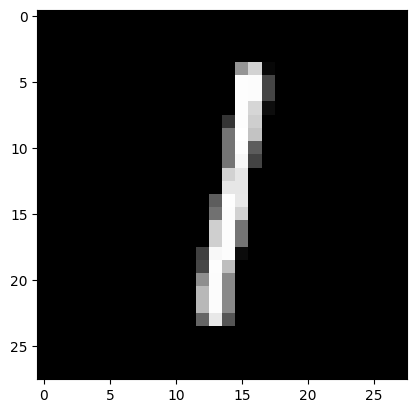

Predicted:  1


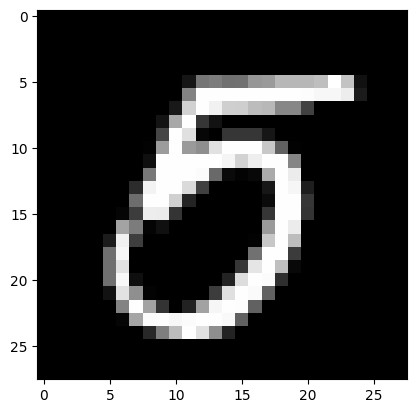

Predicted:  5


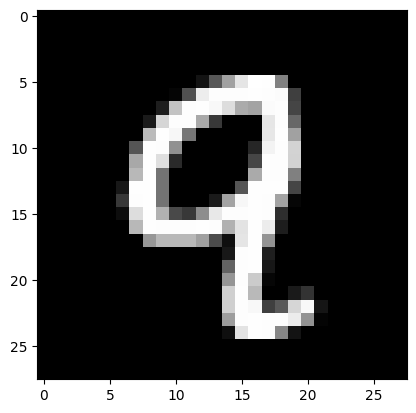

Predicted:  9


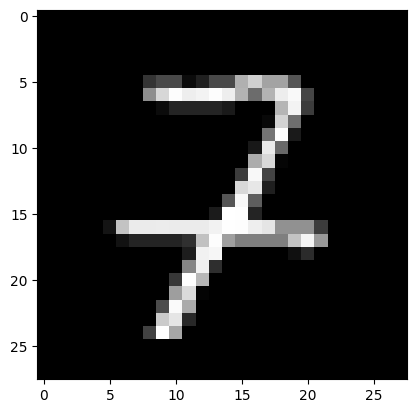

Predicted:  2


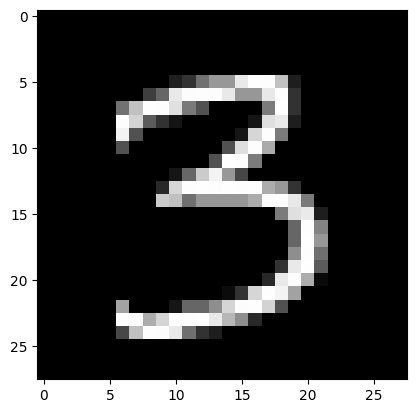

Predicted:  3


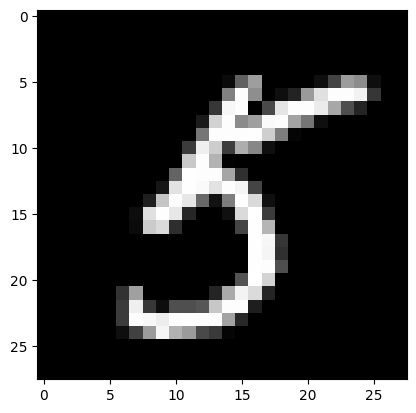

Predicted:  5


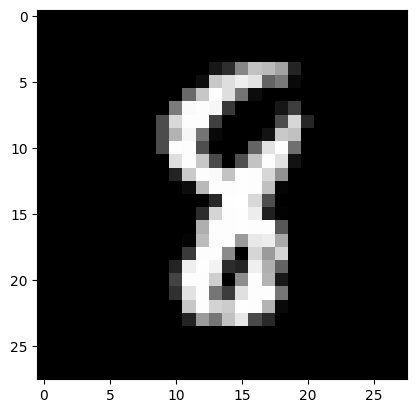

Predicted:  8


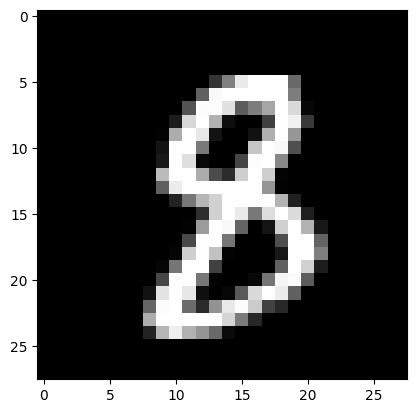

Predicted:  8


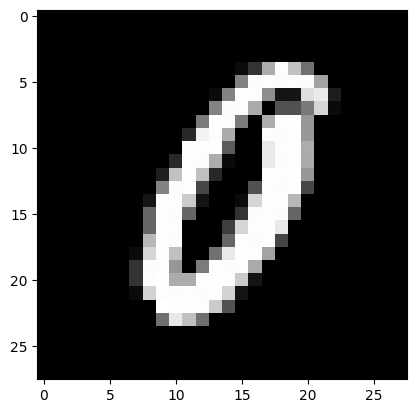

Predicted:  0


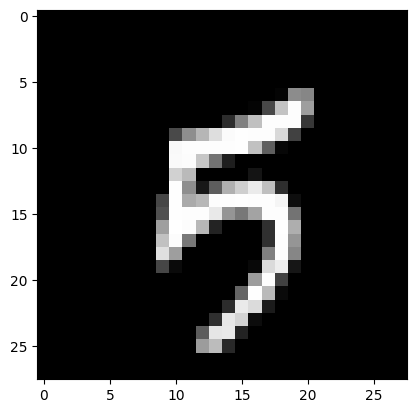

Predicted:  9


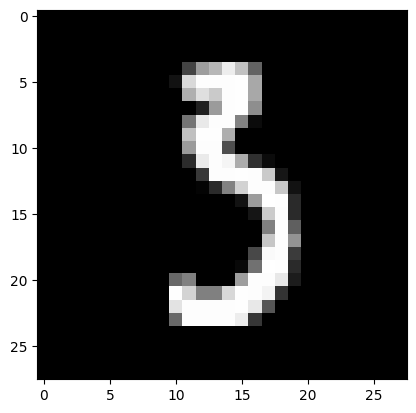

Predicted:  5


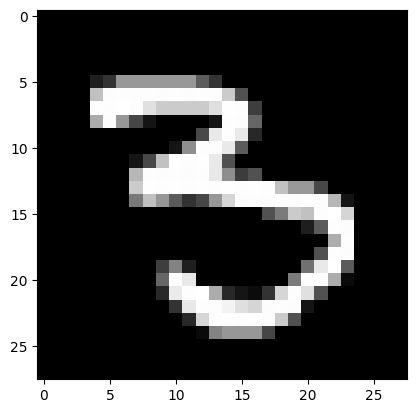

Predicted:  3


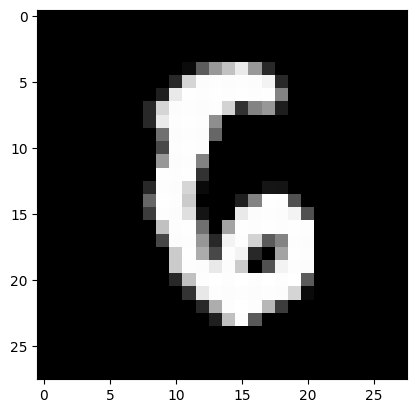

Predicted:  6


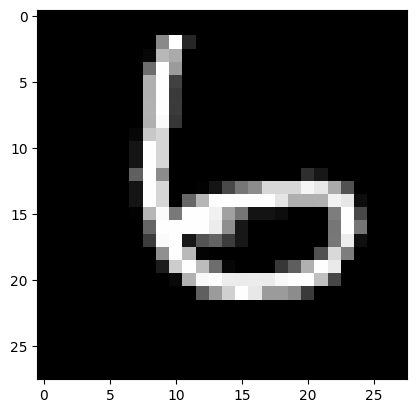

Predicted:  6


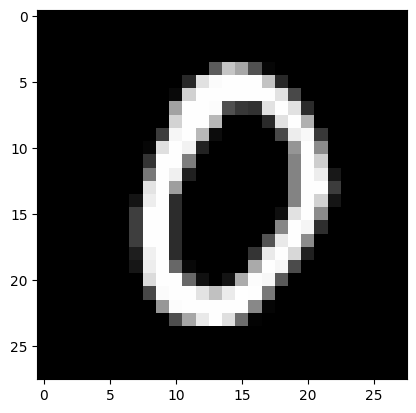

Predicted:  0


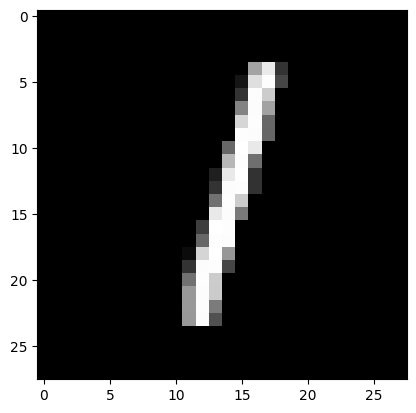

Predicted:  1


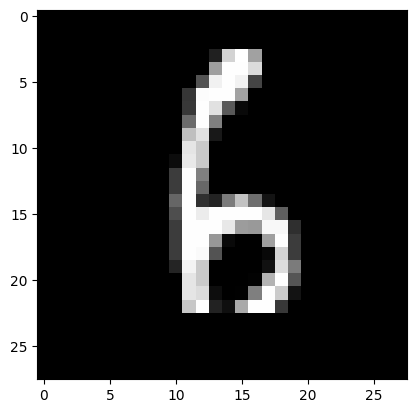

Predicted:  6


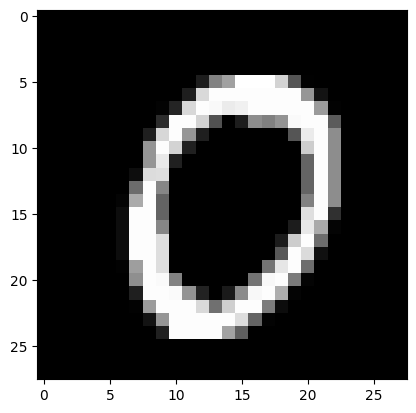

Predicted:  0


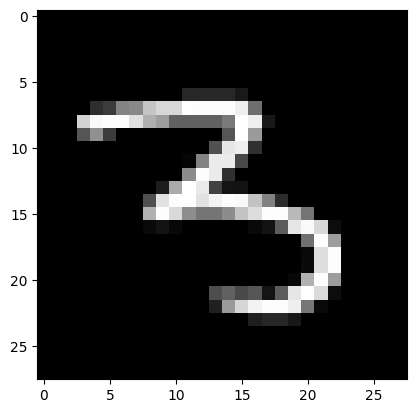

Predicted:  3


KeyboardInterrupt: ignored

In [ ]:
# test the model after training on images test data
# print predictions and images


for i in range(len(test_data_small)):
    img = test_data_small.data[i]
    plt.imshow(img, cmap='gray')
    plt.show()
    img = img.reshape(-1, 28*28)
    img = img.type(torch.FloatTensor)
    output = model_small(img)
    _, predicted = torch.max(output.data, 1)
    print('Predicted: ', predicted.item())

In [ ]:
# test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Test Accuracy of the model on the 10000 test images: 96.85 %
